In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [25]:
# load a.mat
import scipy.io

mat = scipy.io.loadmat('a.mat')['a']

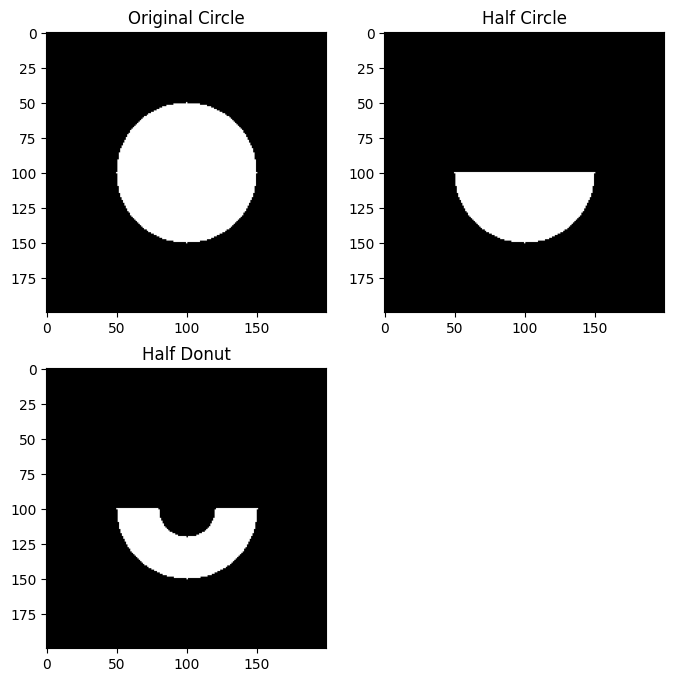

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def generate_circle(radius, center, shape):
    """
    Generate a binary matrix representing a circle.

    Args:
    - radius: Radius of the circle.
    - center: Coordinates of the center of the circle.
    - shape: Shape of the output matrix.

    Returns:
    - circle_matrix: Binary matrix representing the circle.
    """
    circle_matrix = np.zeros(shape, dtype=bool)
    for i in range(shape[0]):
        for j in range(shape[1]):
            if (i - center[0])**2 + (j - center[1])**2 <= radius**2:
                circle_matrix[i, j] = 1
    return circle_matrix



def crop_with_smaller_circle(matrix, smaller_radius, center):
    """
    Crop the input matrix using a smaller circle.

    Args:
    - matrix: Input binary matrix.
    - smaller_radius: Radius of the smaller circle.
    - center: Coordinates of the center of the smaller circle.

    Returns:
    - cropped_matrix: Output matrix after cropping with the smaller circle.
    """
    cropped_matrix = np.copy(matrix)
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            if (i - center[0])**2 + (j - center[1])**2 > smaller_radius**2:
                cropped_matrix[i, j] = 0
    return cropped_matrix

def subtract_circle2(matrix, smaller_radius, center):
    """
    Subtract a smaller circle from the input matrix.

    Args:
    - matrix: Input binary matrix.
    - smaller_radius: Radius of the smaller circle.
    - center: Coordinates of the center of the smaller circle.

    Returns:
    - result_matrix: Output matrix after subtracting the smaller circle.
    """
    result_matrix = np.copy(matrix)
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            if (i - center[0])**2 + (j - center[1])**2 <= smaller_radius**2:
                result_matrix[i, j] = 0
    return result_matrix

def subtract_circle(matrix, smaller_radius, center):
    """
    Subtract a smaller circle from the input matrix.

    Args:
    - matrix: Input binary matrix.
    - smaller_radius: Radius of the smaller circle.
    - center: Coordinates of the center of the smaller circle.

    Returns:
    - result_matrix: Output matrix after subtracting the smaller circle.
    """
    # Create a grid of coordinates
    x, y = np.meshgrid(np.arange(matrix.shape[1]), np.arange(matrix.shape[0]))
    
    # Calculate distances from each point to the center
    distances = (x - center[1])**2 + (y - center[0])**2
    
    # Set pixels within the smaller circle radius to 0
    result_matrix = np.copy(matrix)
    result_matrix[distances <= smaller_radius**2] = 0
    
    return result_matrix

# Define parameters
circle_radius = 50
circle_center = (100, 100)
matrix_shape = (200, 200)
smaller_circle_radius = 40
smaller_circle_center = (100, 100)

# Generate the circle matrix
circle_matrix = generate_circle(circle_radius, circle_center, matrix_shape)

# Cut the upper half
half_circle_matrix = cut_upper_half(circle_matrix)

# Crop with a smaller circle
# cropped_half_circle = crop_with_smaller_circle(half_circle_matrix, smaller_circle_radius, smaller_circle_center)

# Subtract another circle to make a half donut
half_donut_matrix = subtract_circle(half_circle_matrix, smaller_circle_radius - 20, smaller_circle_center)

# Plotting
plt.figure(figsize=(8, 8))

plt.subplot(221)
plt.imshow(circle_matrix, cmap='gray')
plt.title('Original Circle')

plt.subplot(222)
plt.imshow(half_circle_matrix, cmap='gray')
plt.title('Half Circle')


plt.subplot(223)
plt.imshow(half_donut_matrix, cmap='gray')
plt.title('Half Donut')

plt.show()


C:\Users\garciaba\AppData\Local\Temp\ipykernel_25864\3384573954.py:8: RuntimeWarning: overflow encountered in exp
  sigmoid = lambda x, beta, lims: lims[0] + np.diff(lims) / (1 + np.exp(-beta * x))


(2400, 2400)
(2400, 2400)
(2400, 2400)
(2400, 2400)
(2400, 2400)
(2400, 2400)
(2400, 2400)
(2400, 2400)
(2400, 2400)
(2400, 2400)
(2400, 2400)
(2400, 2400)


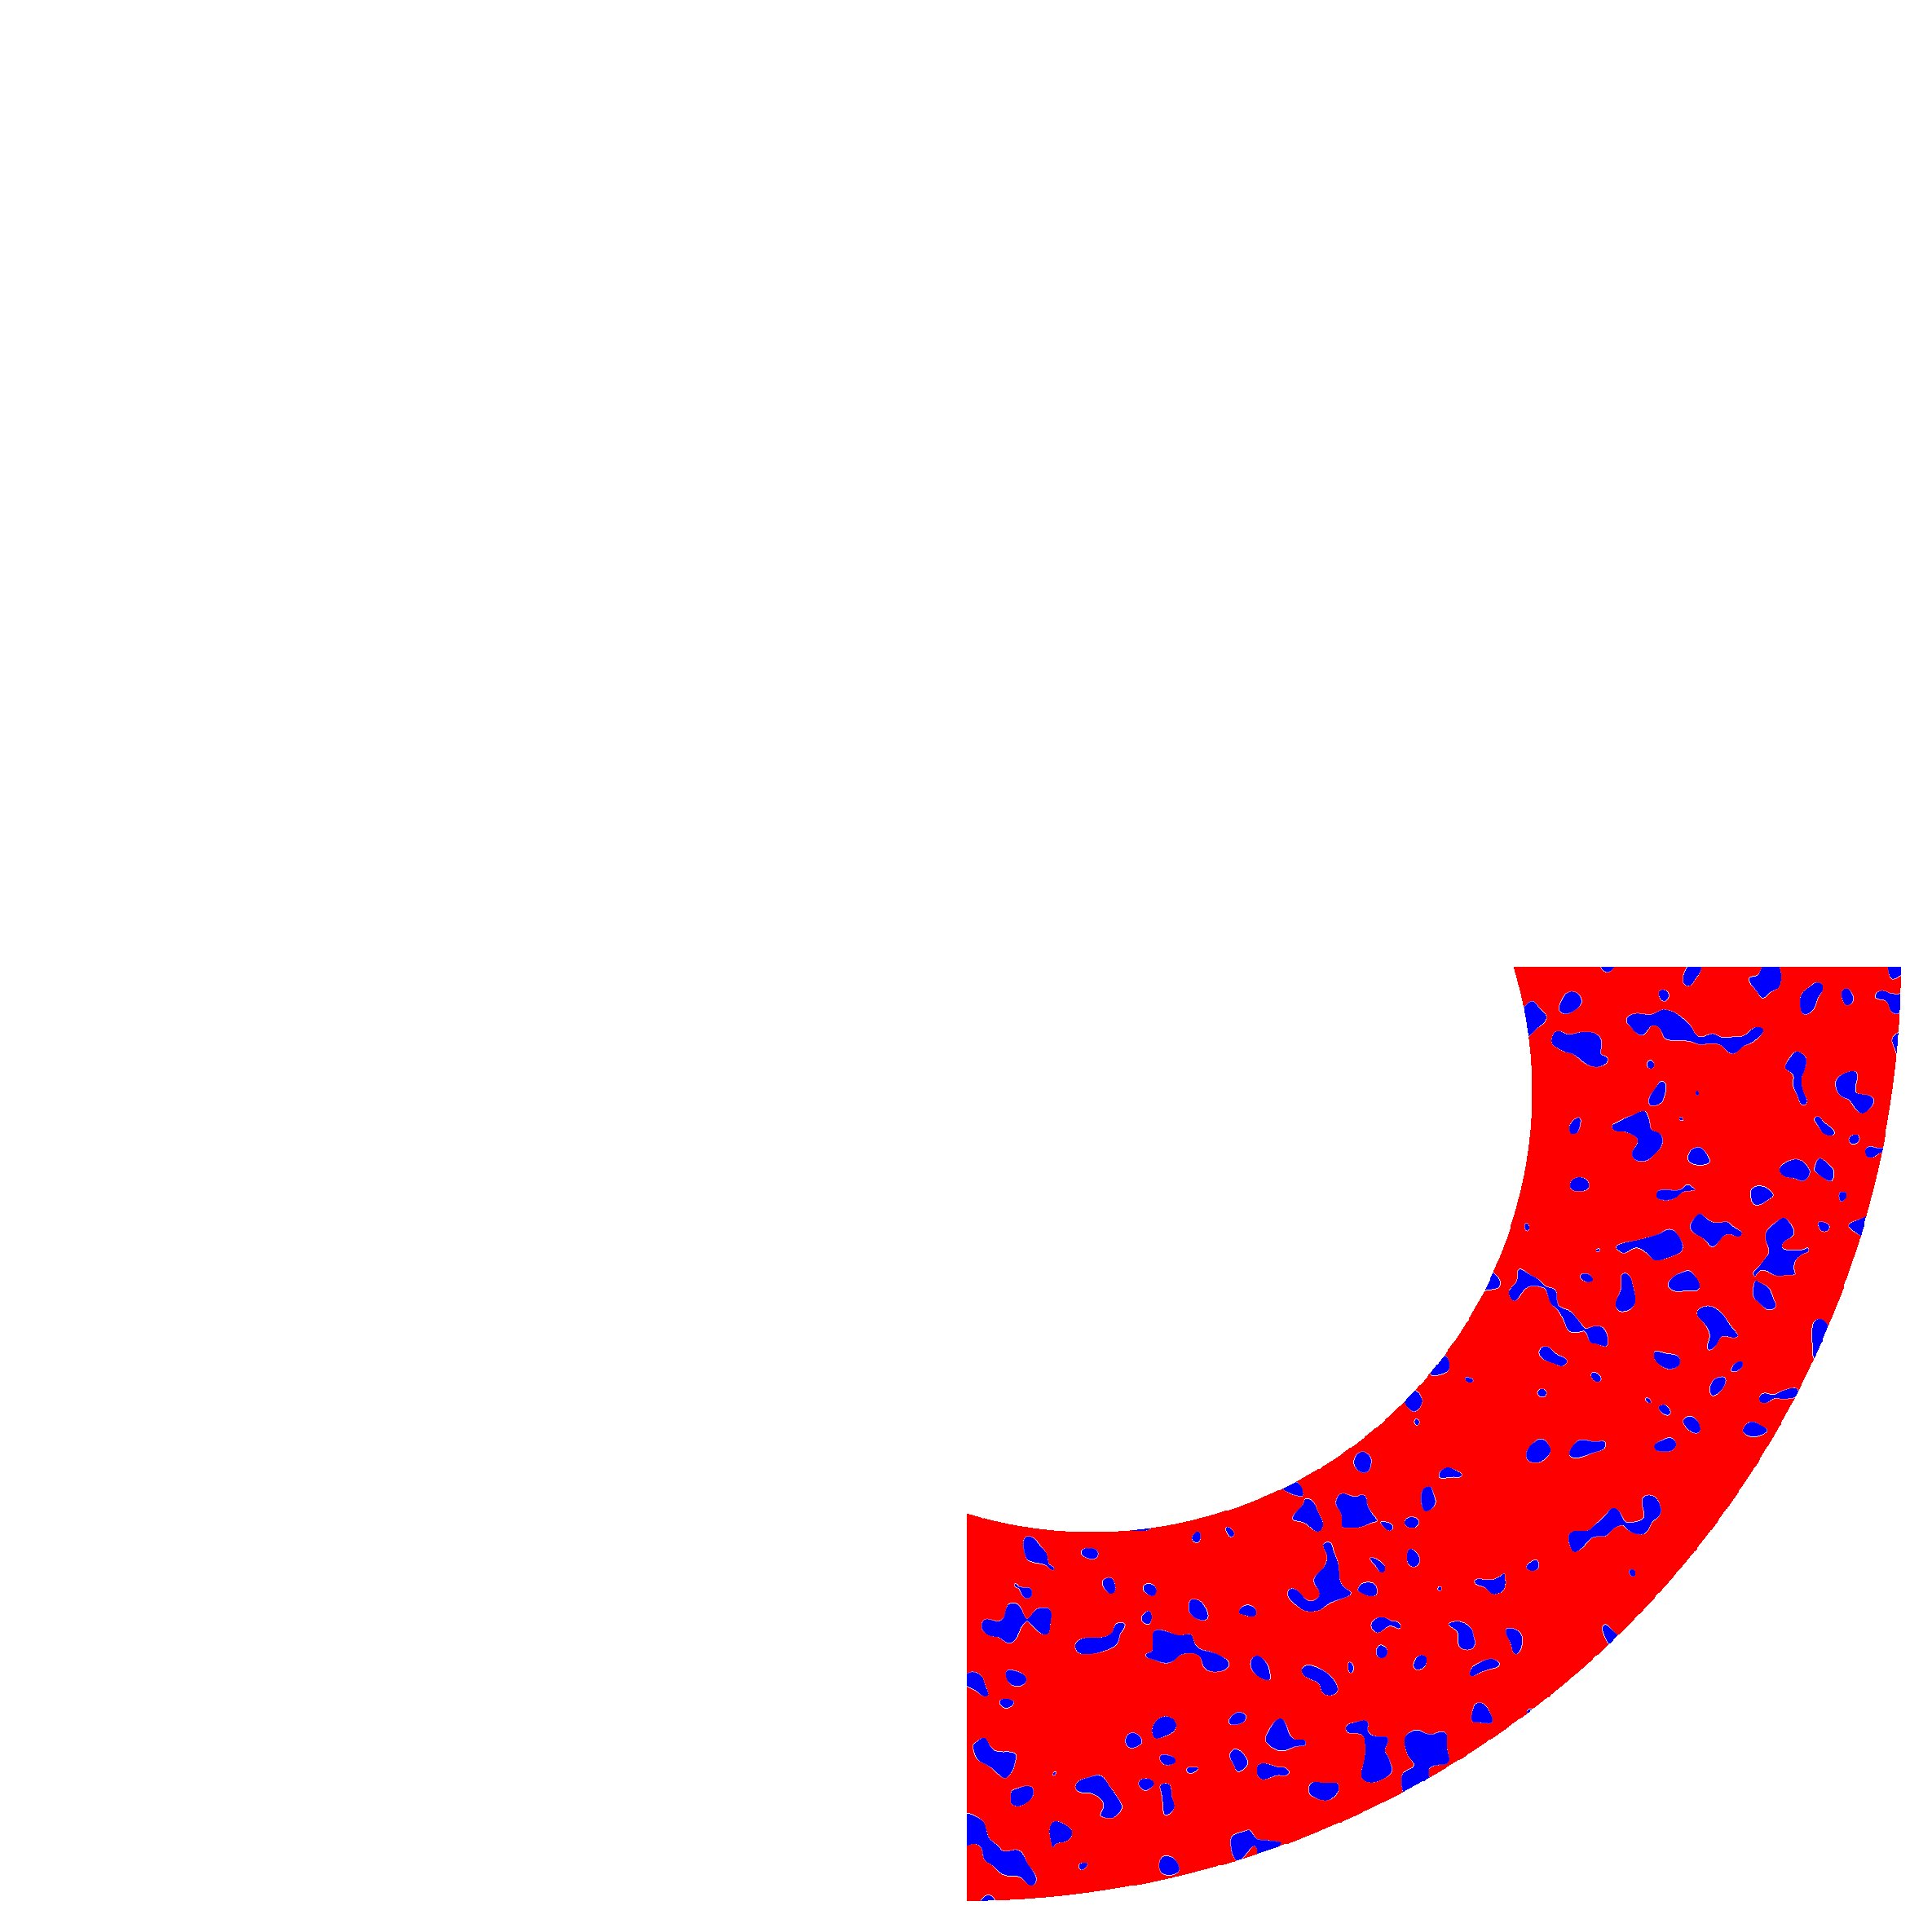

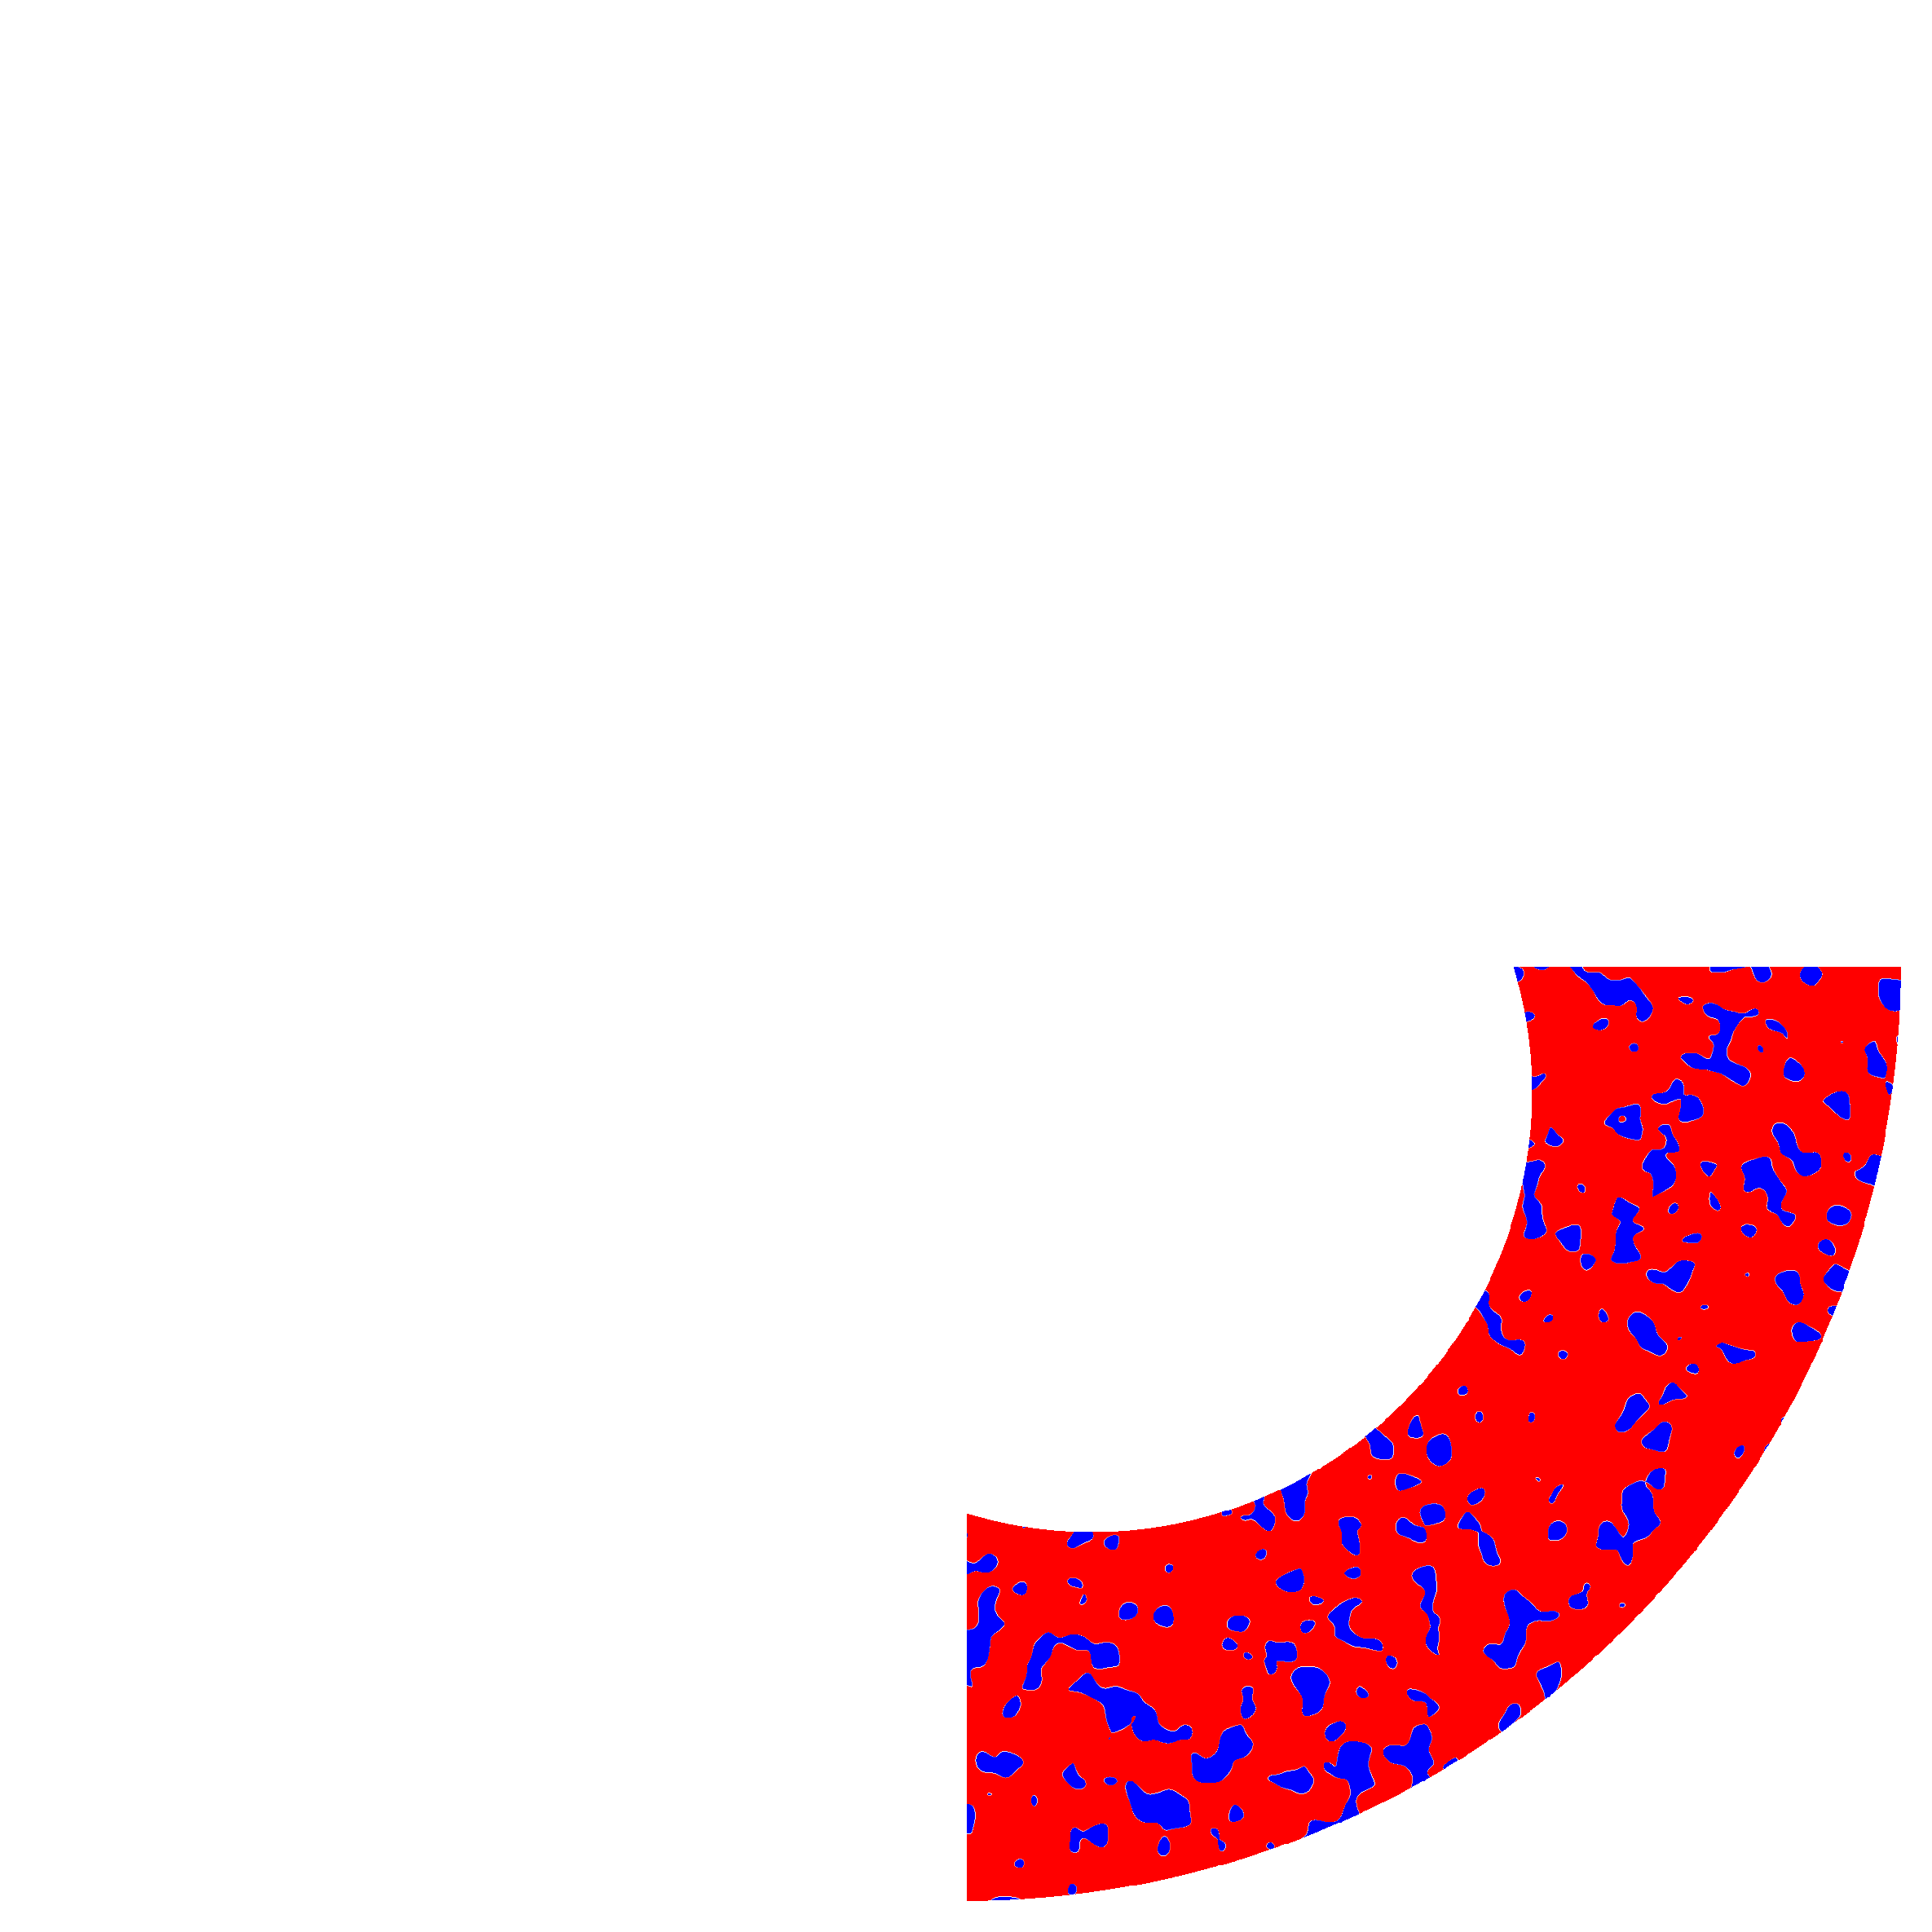

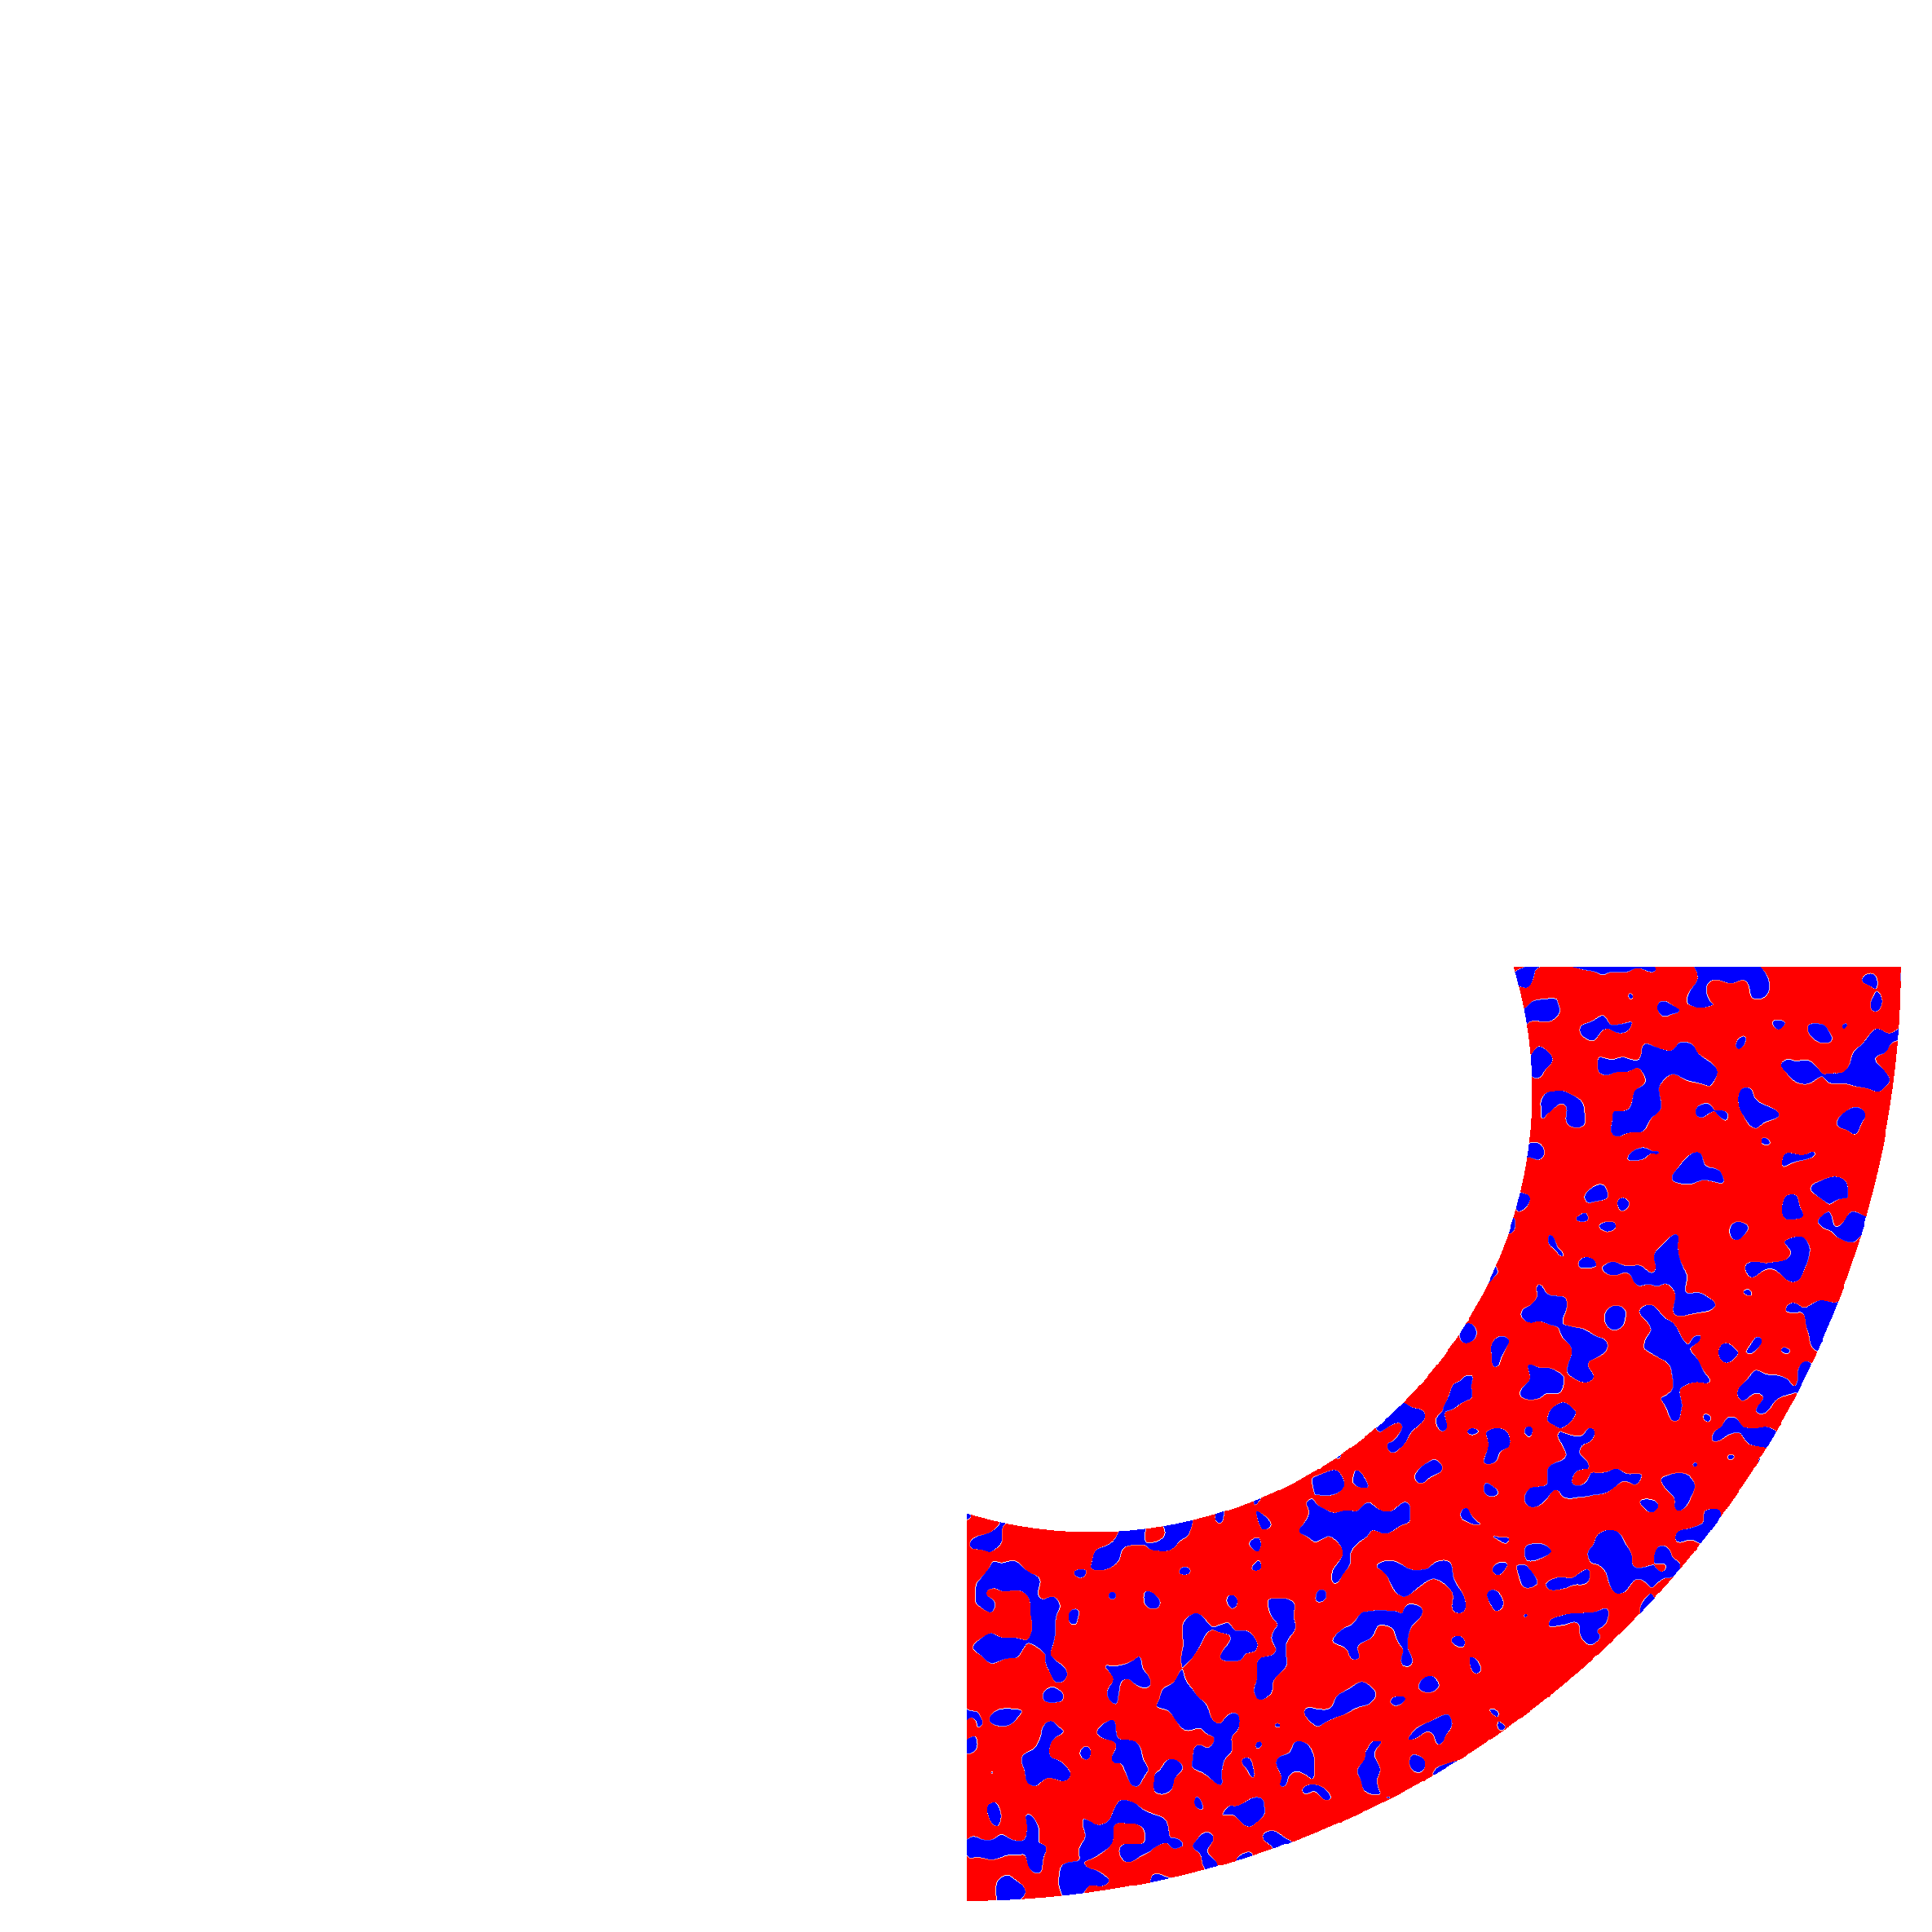

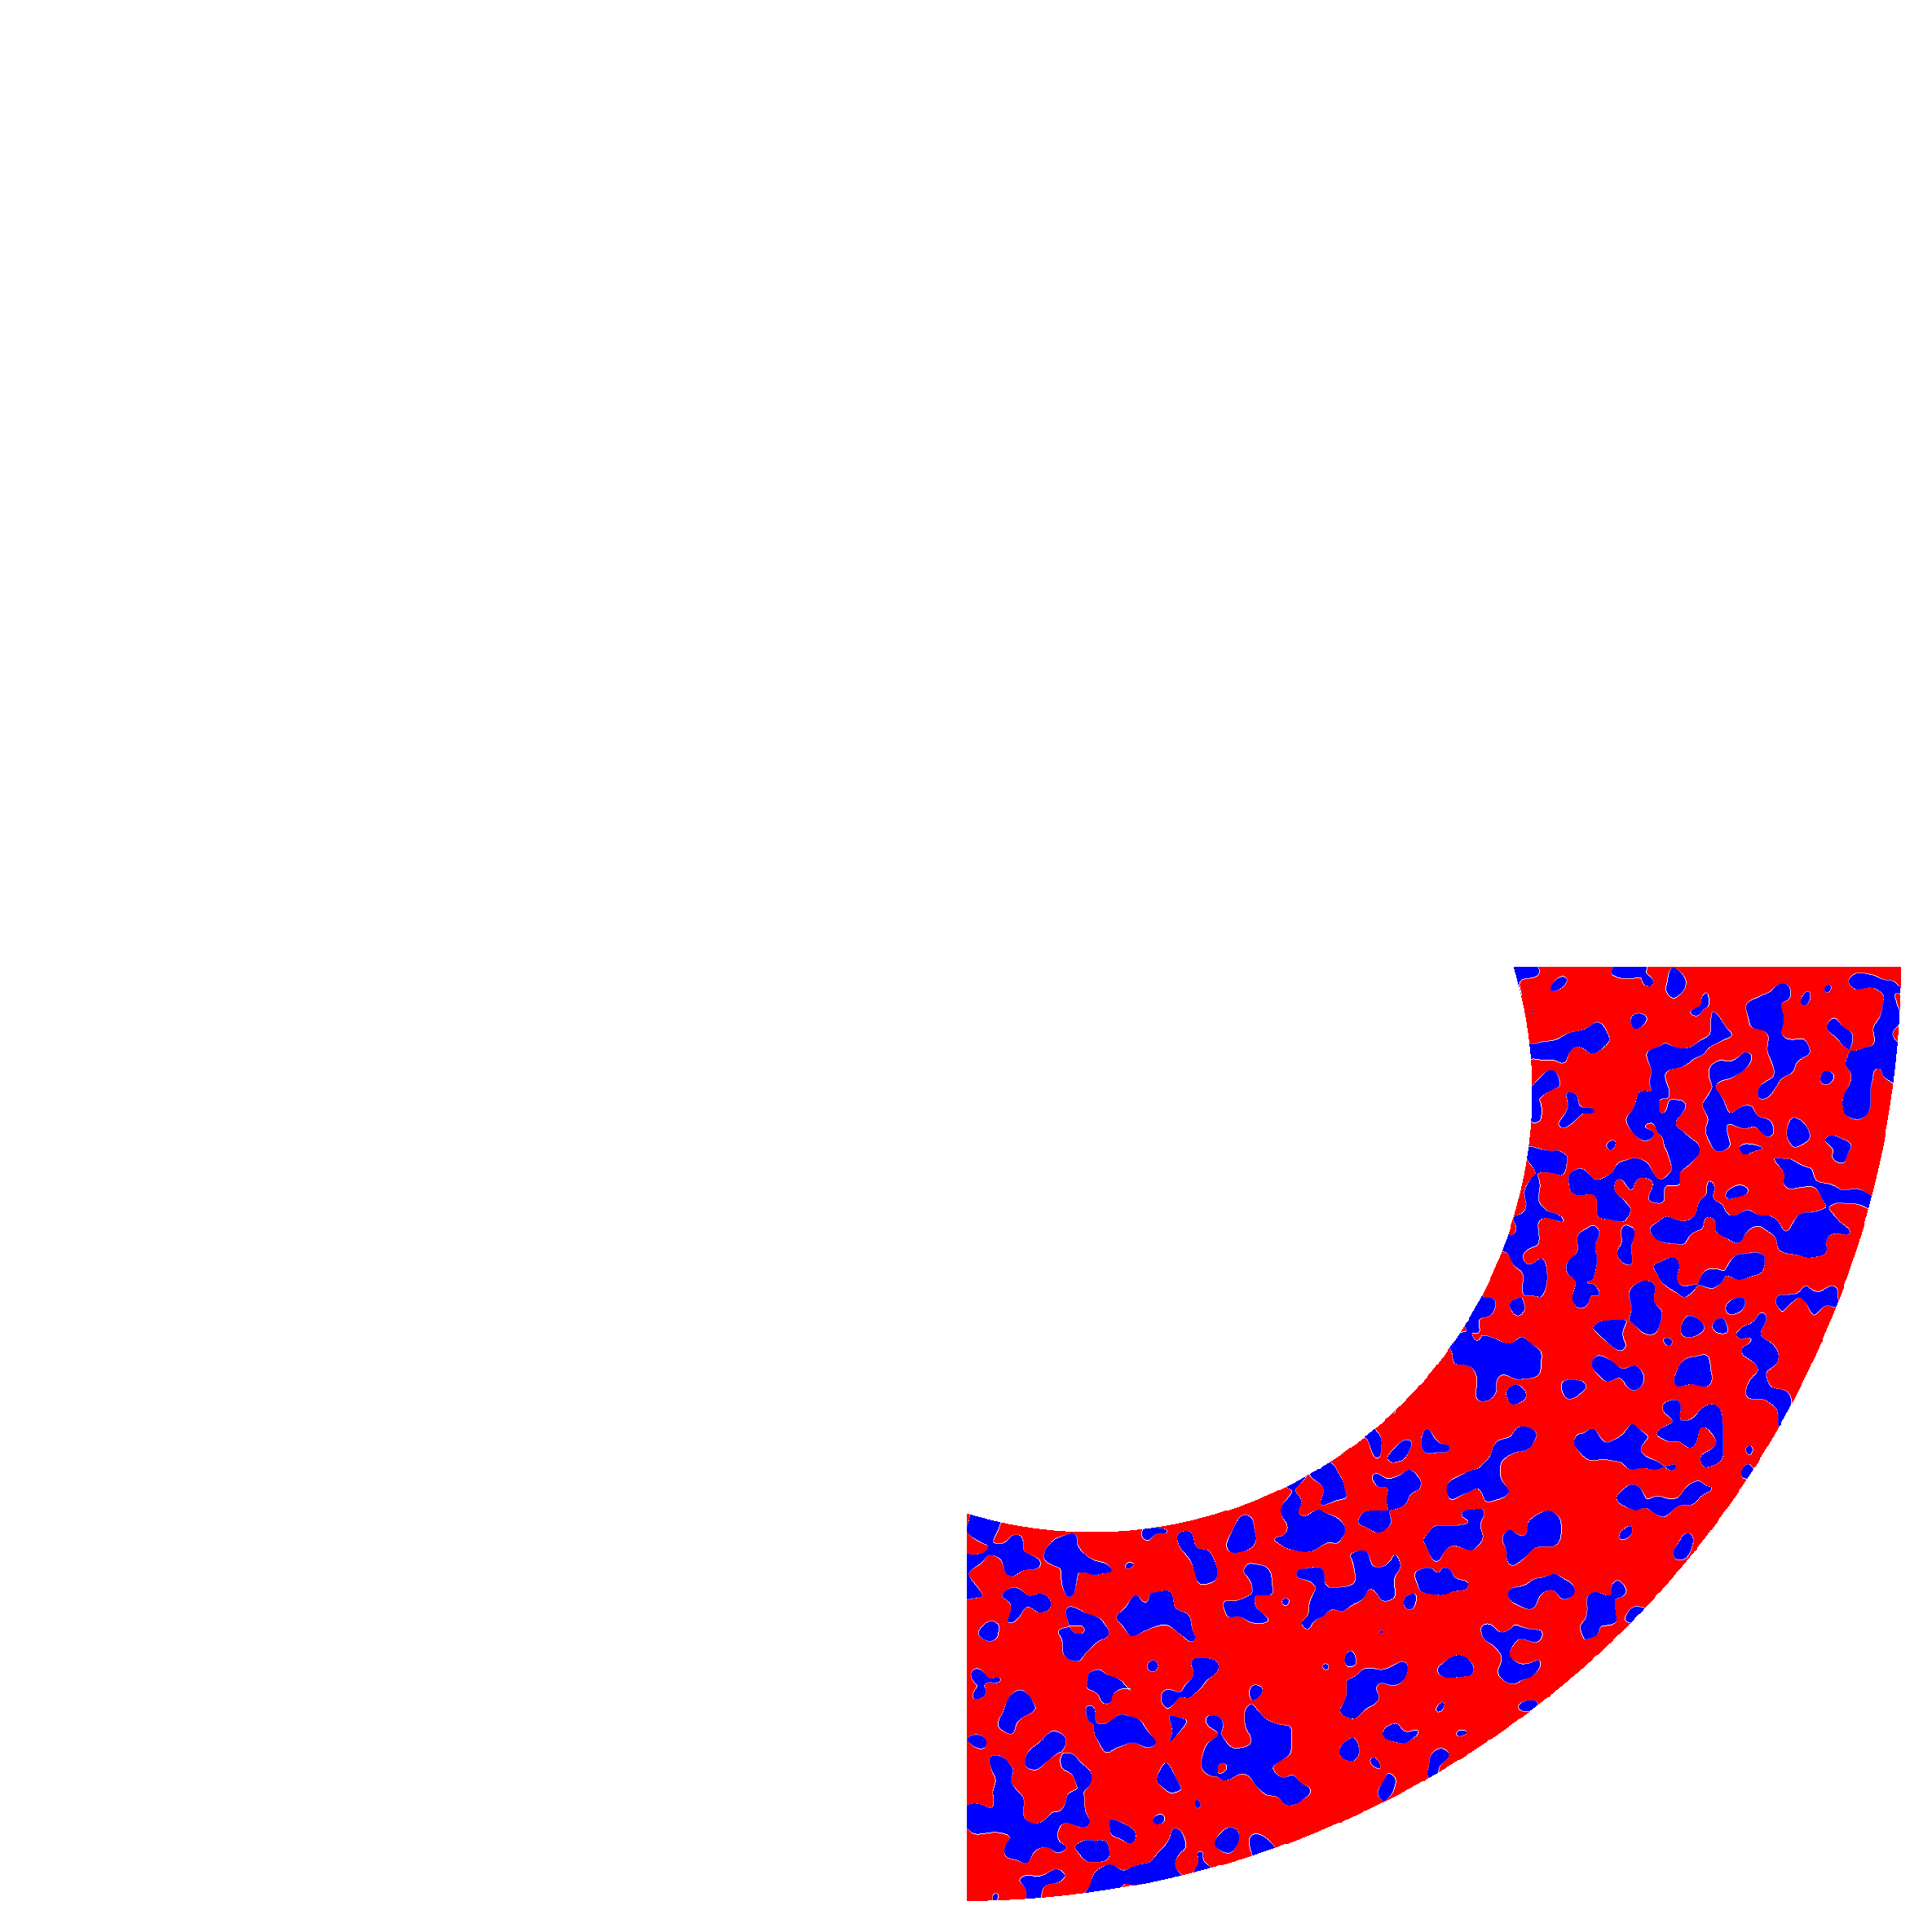

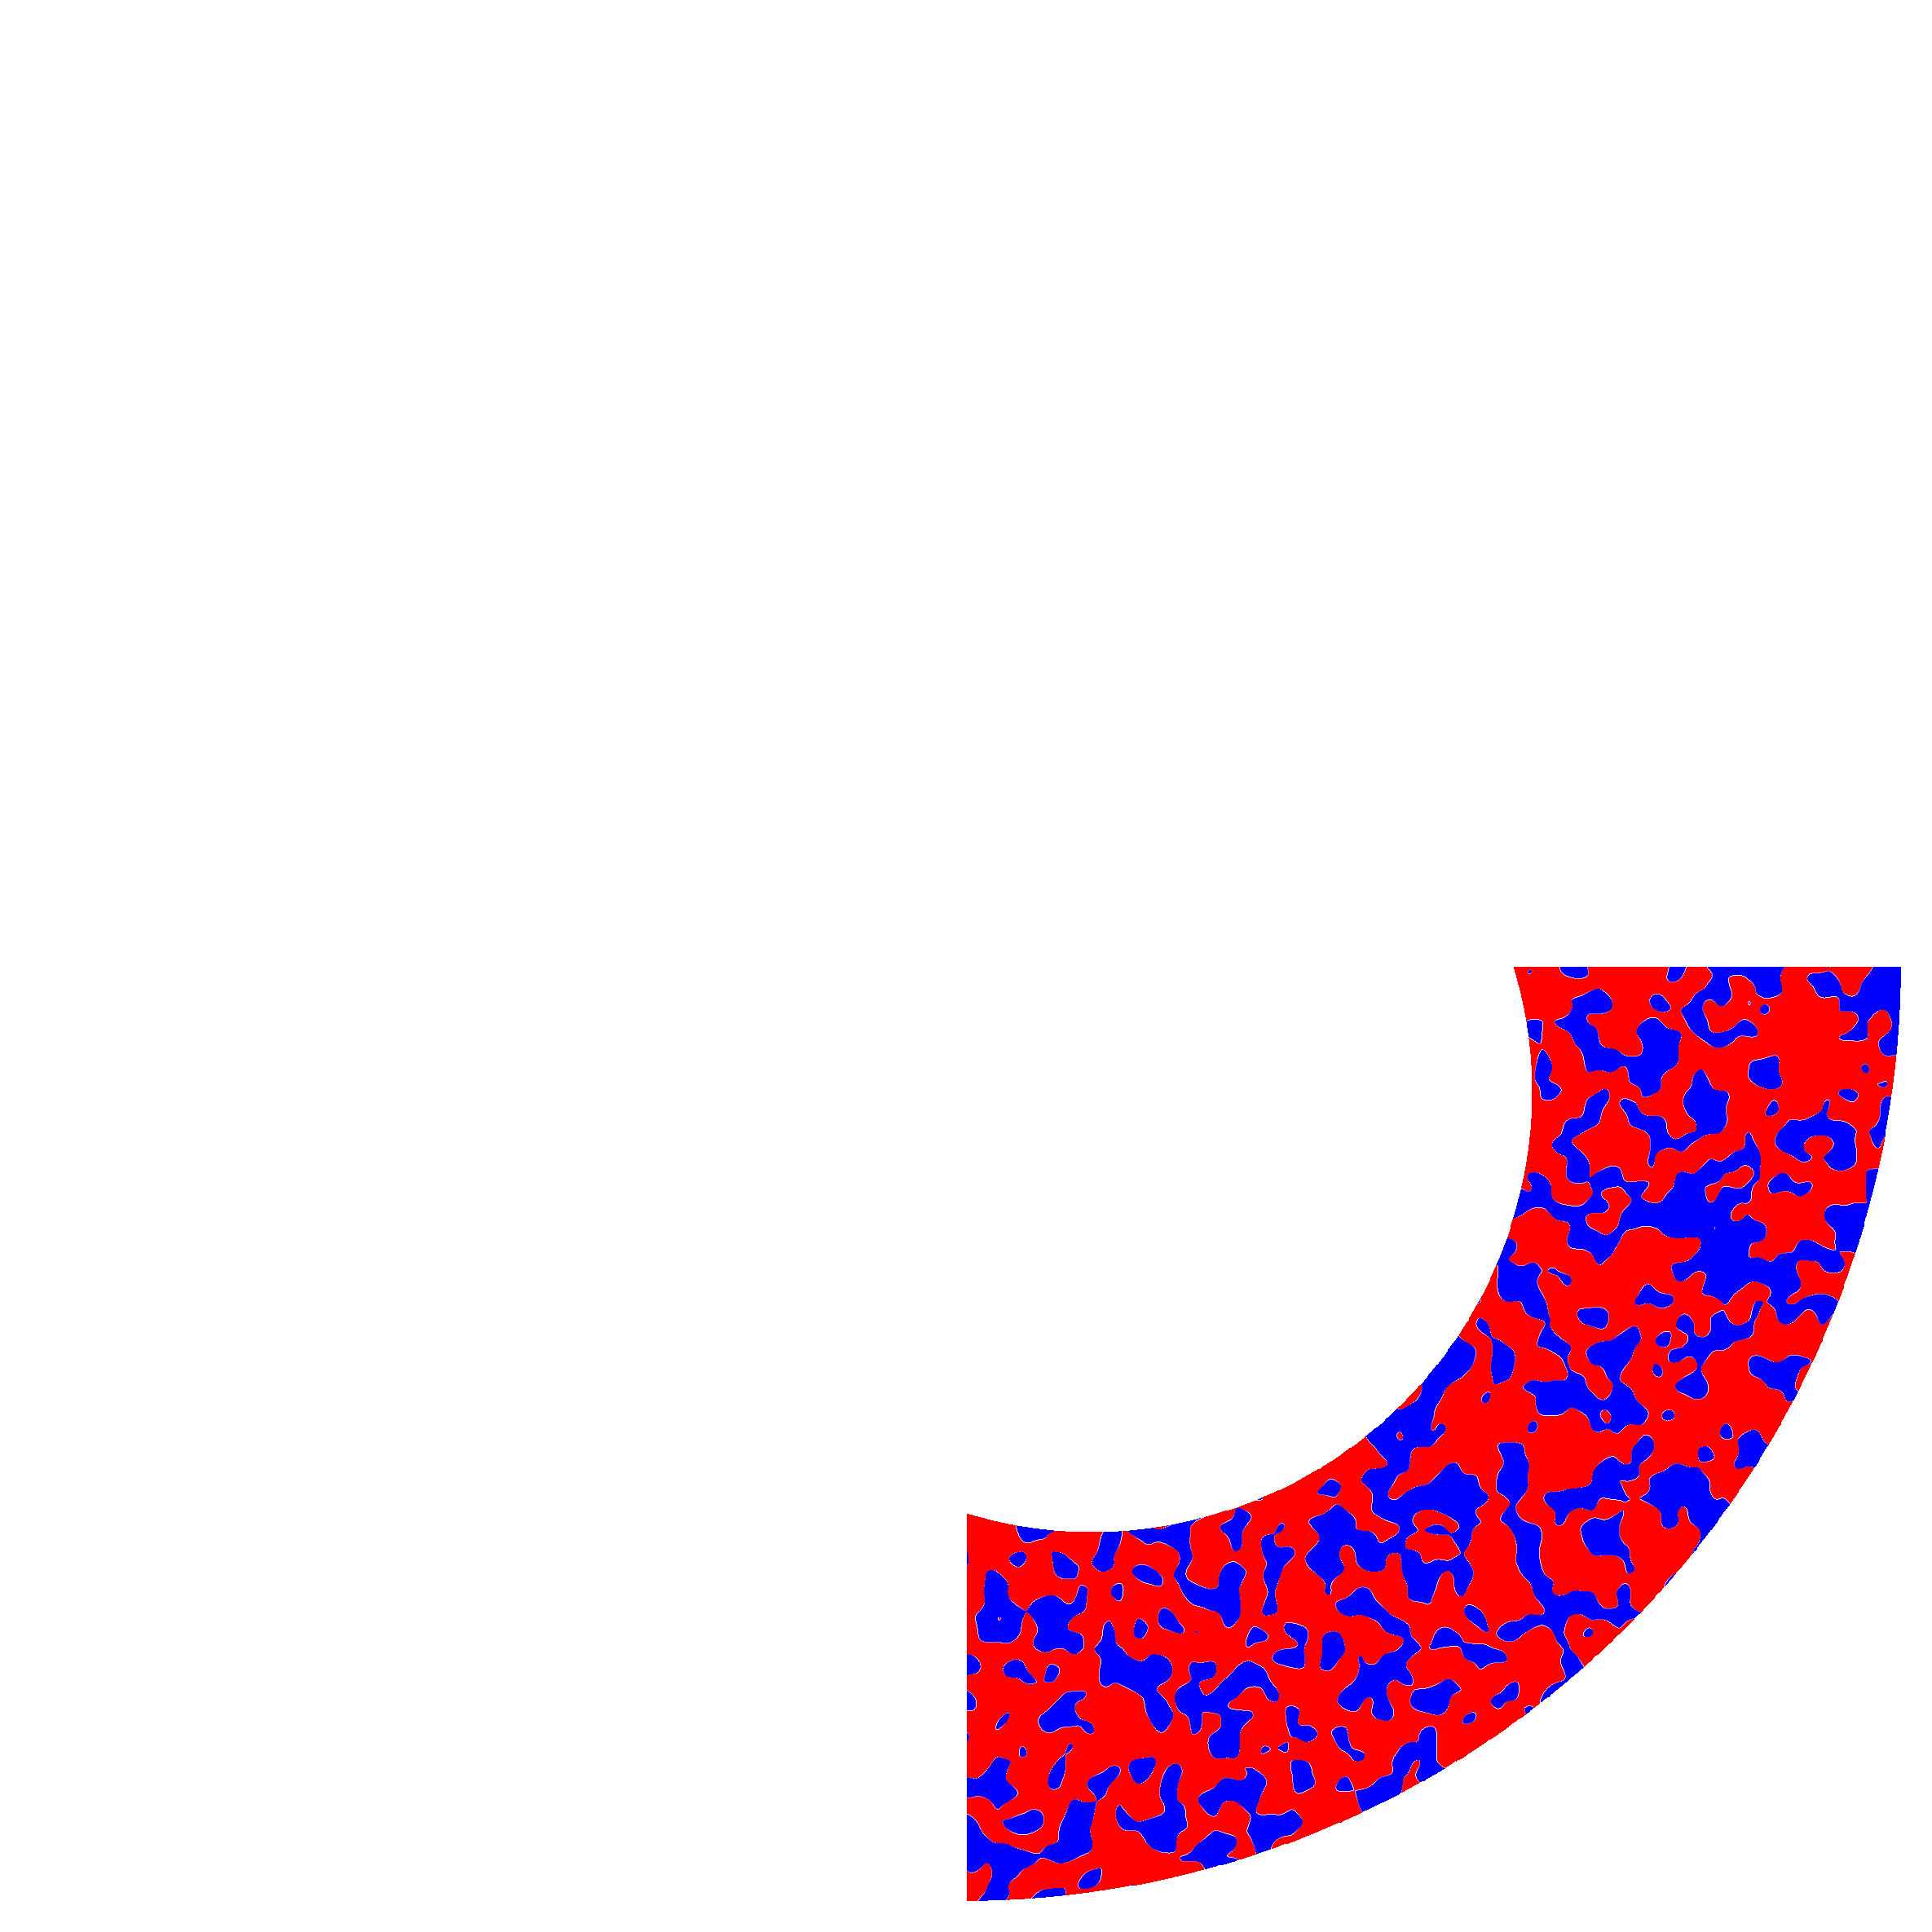

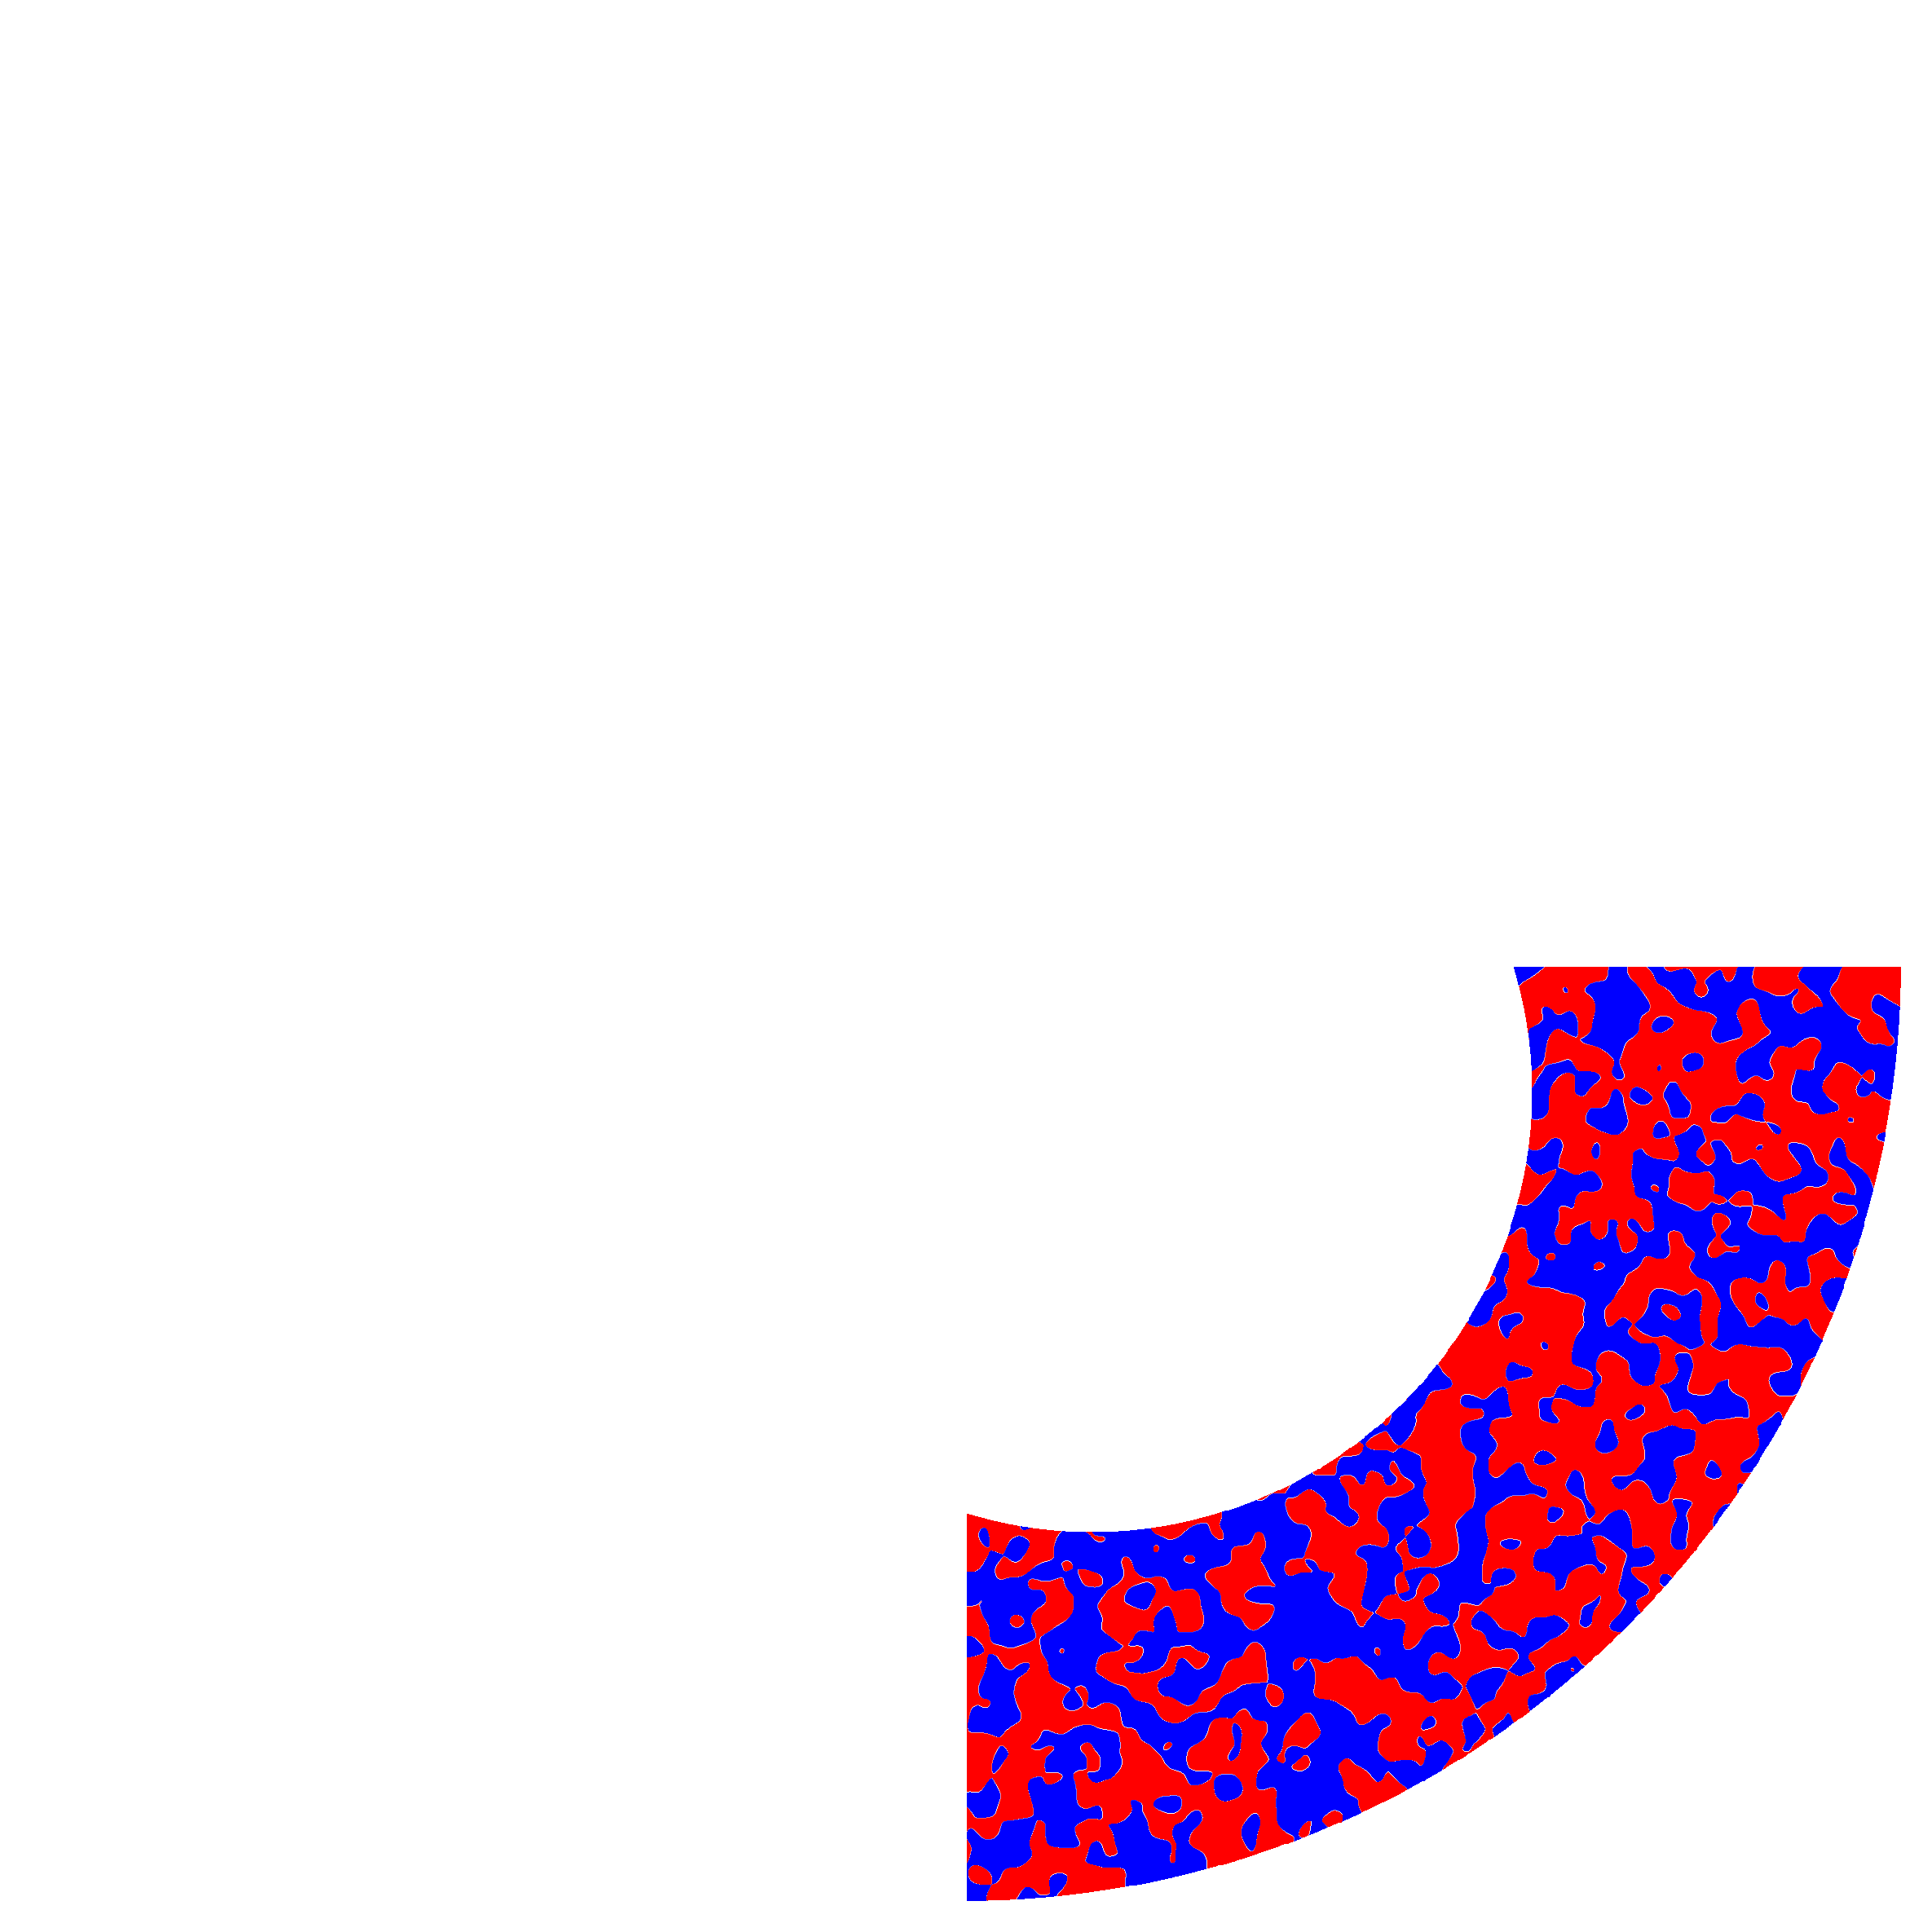

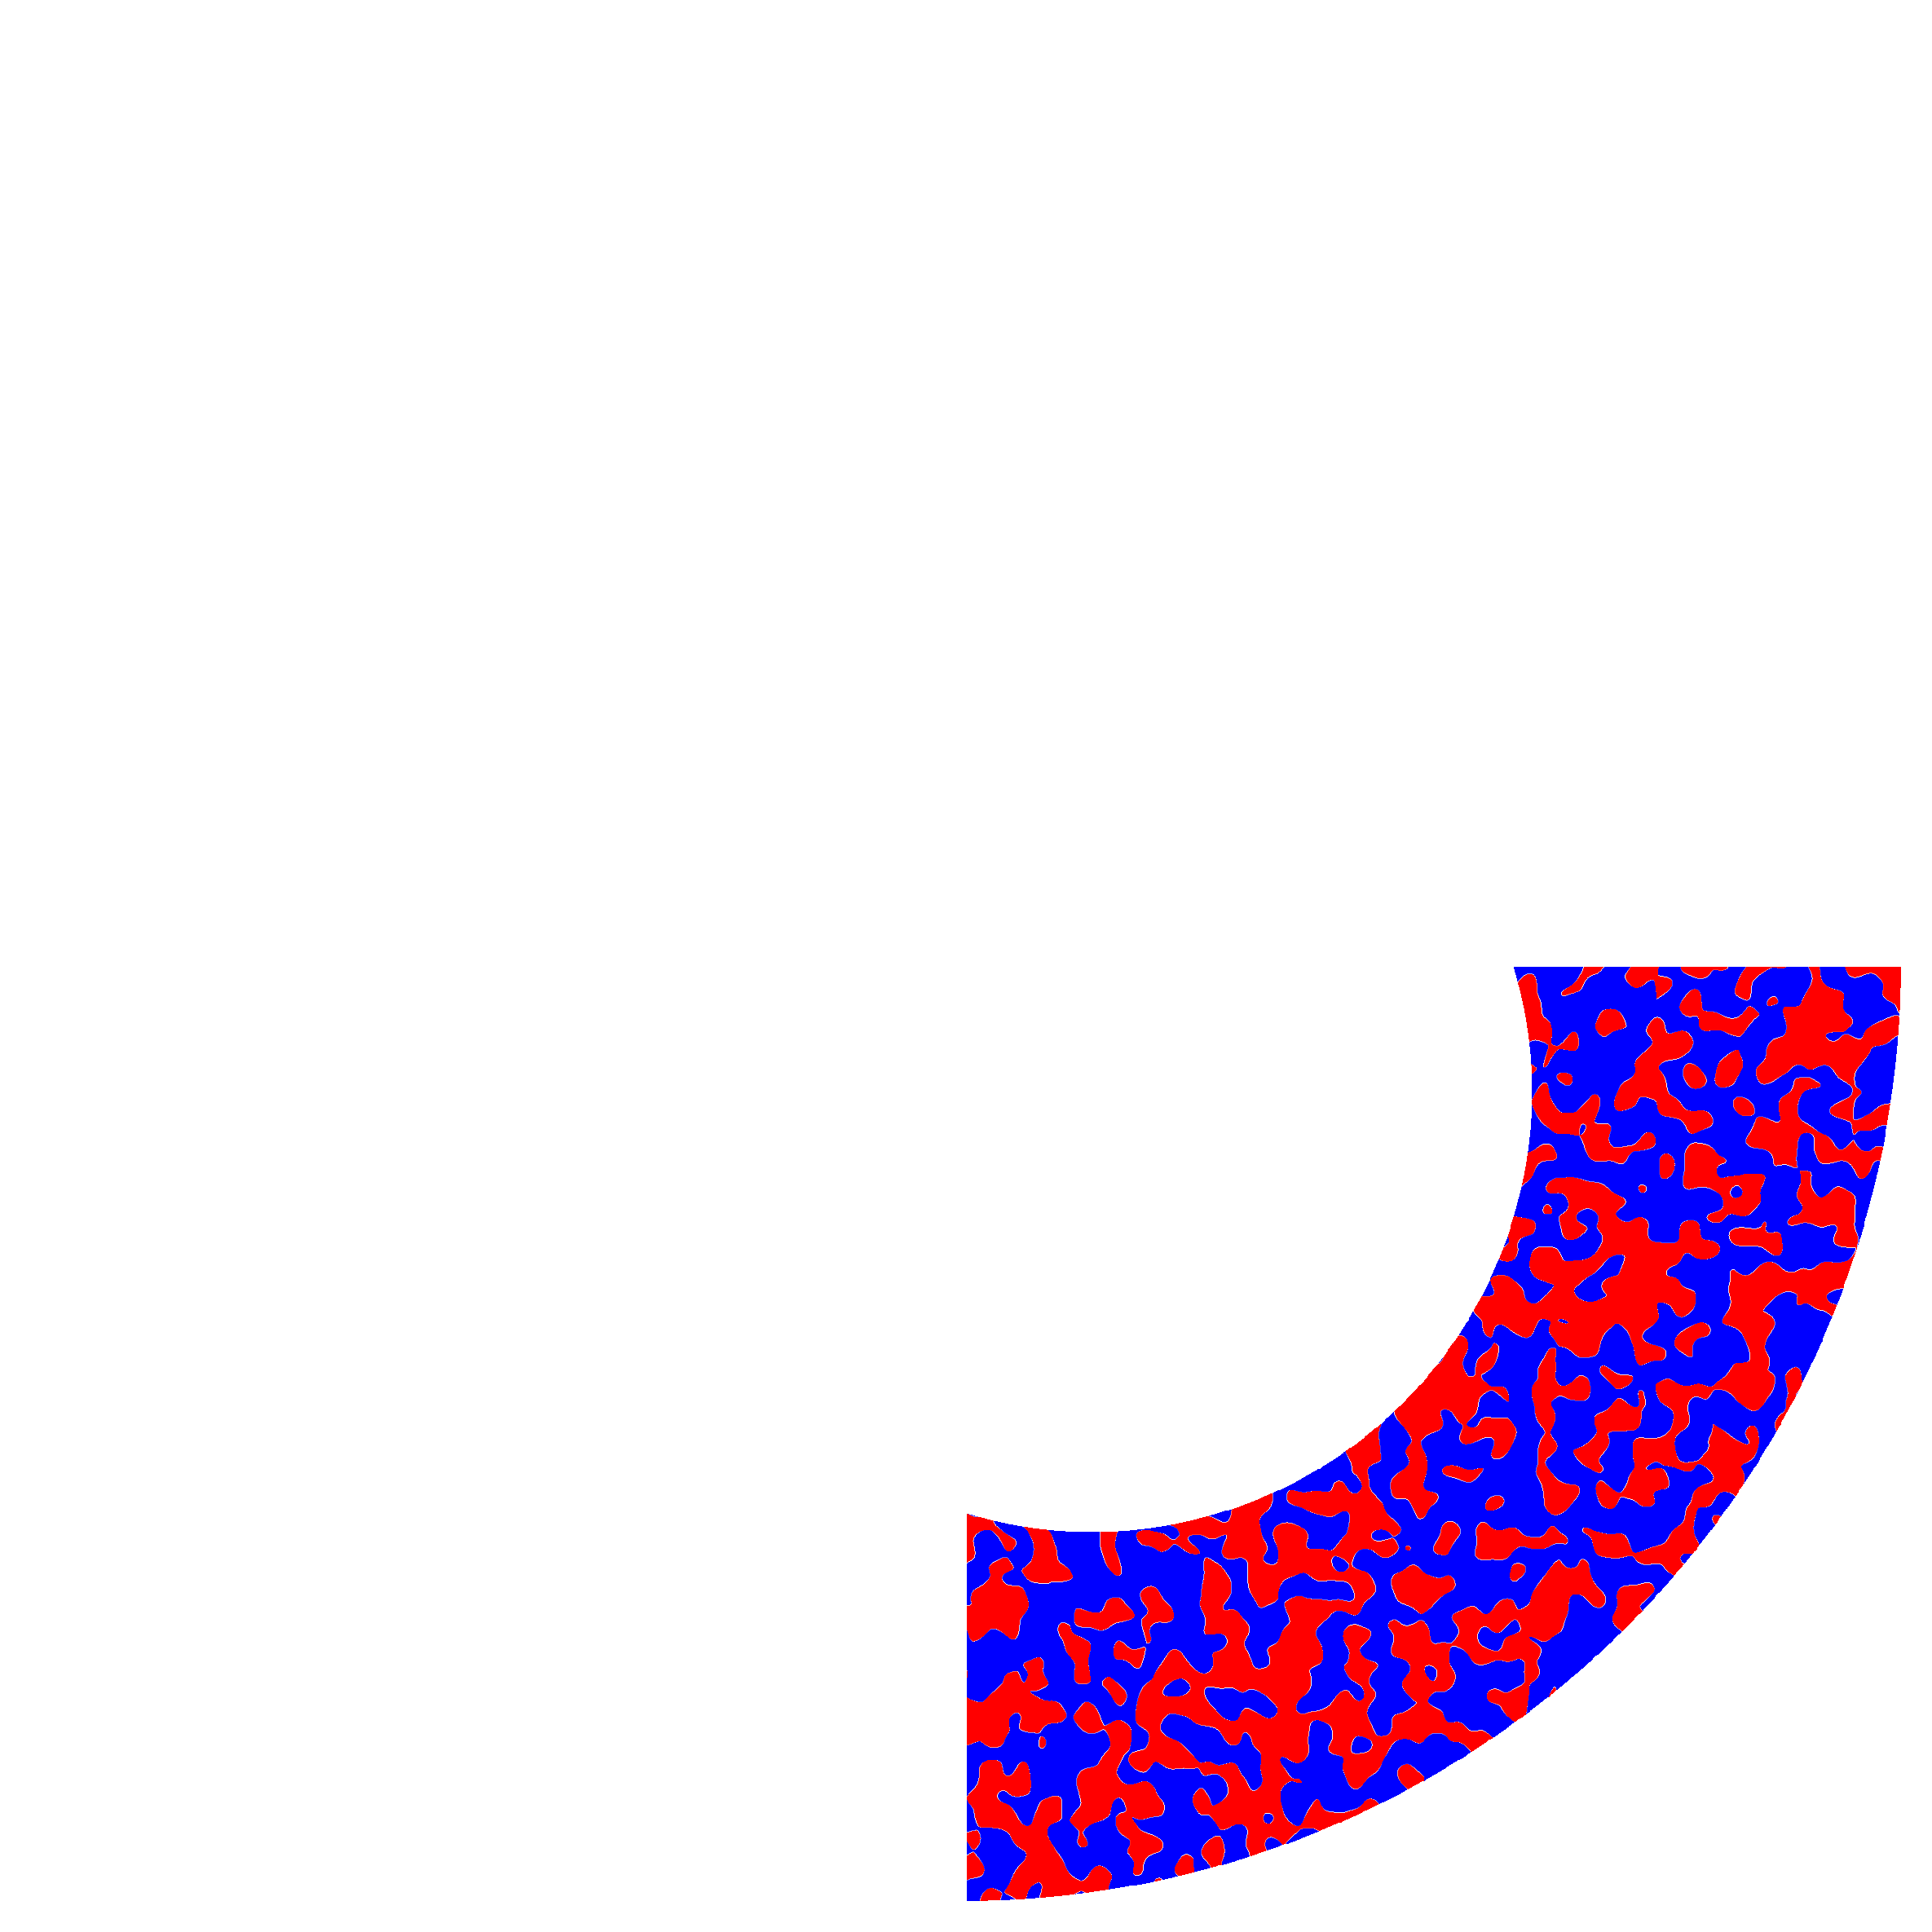

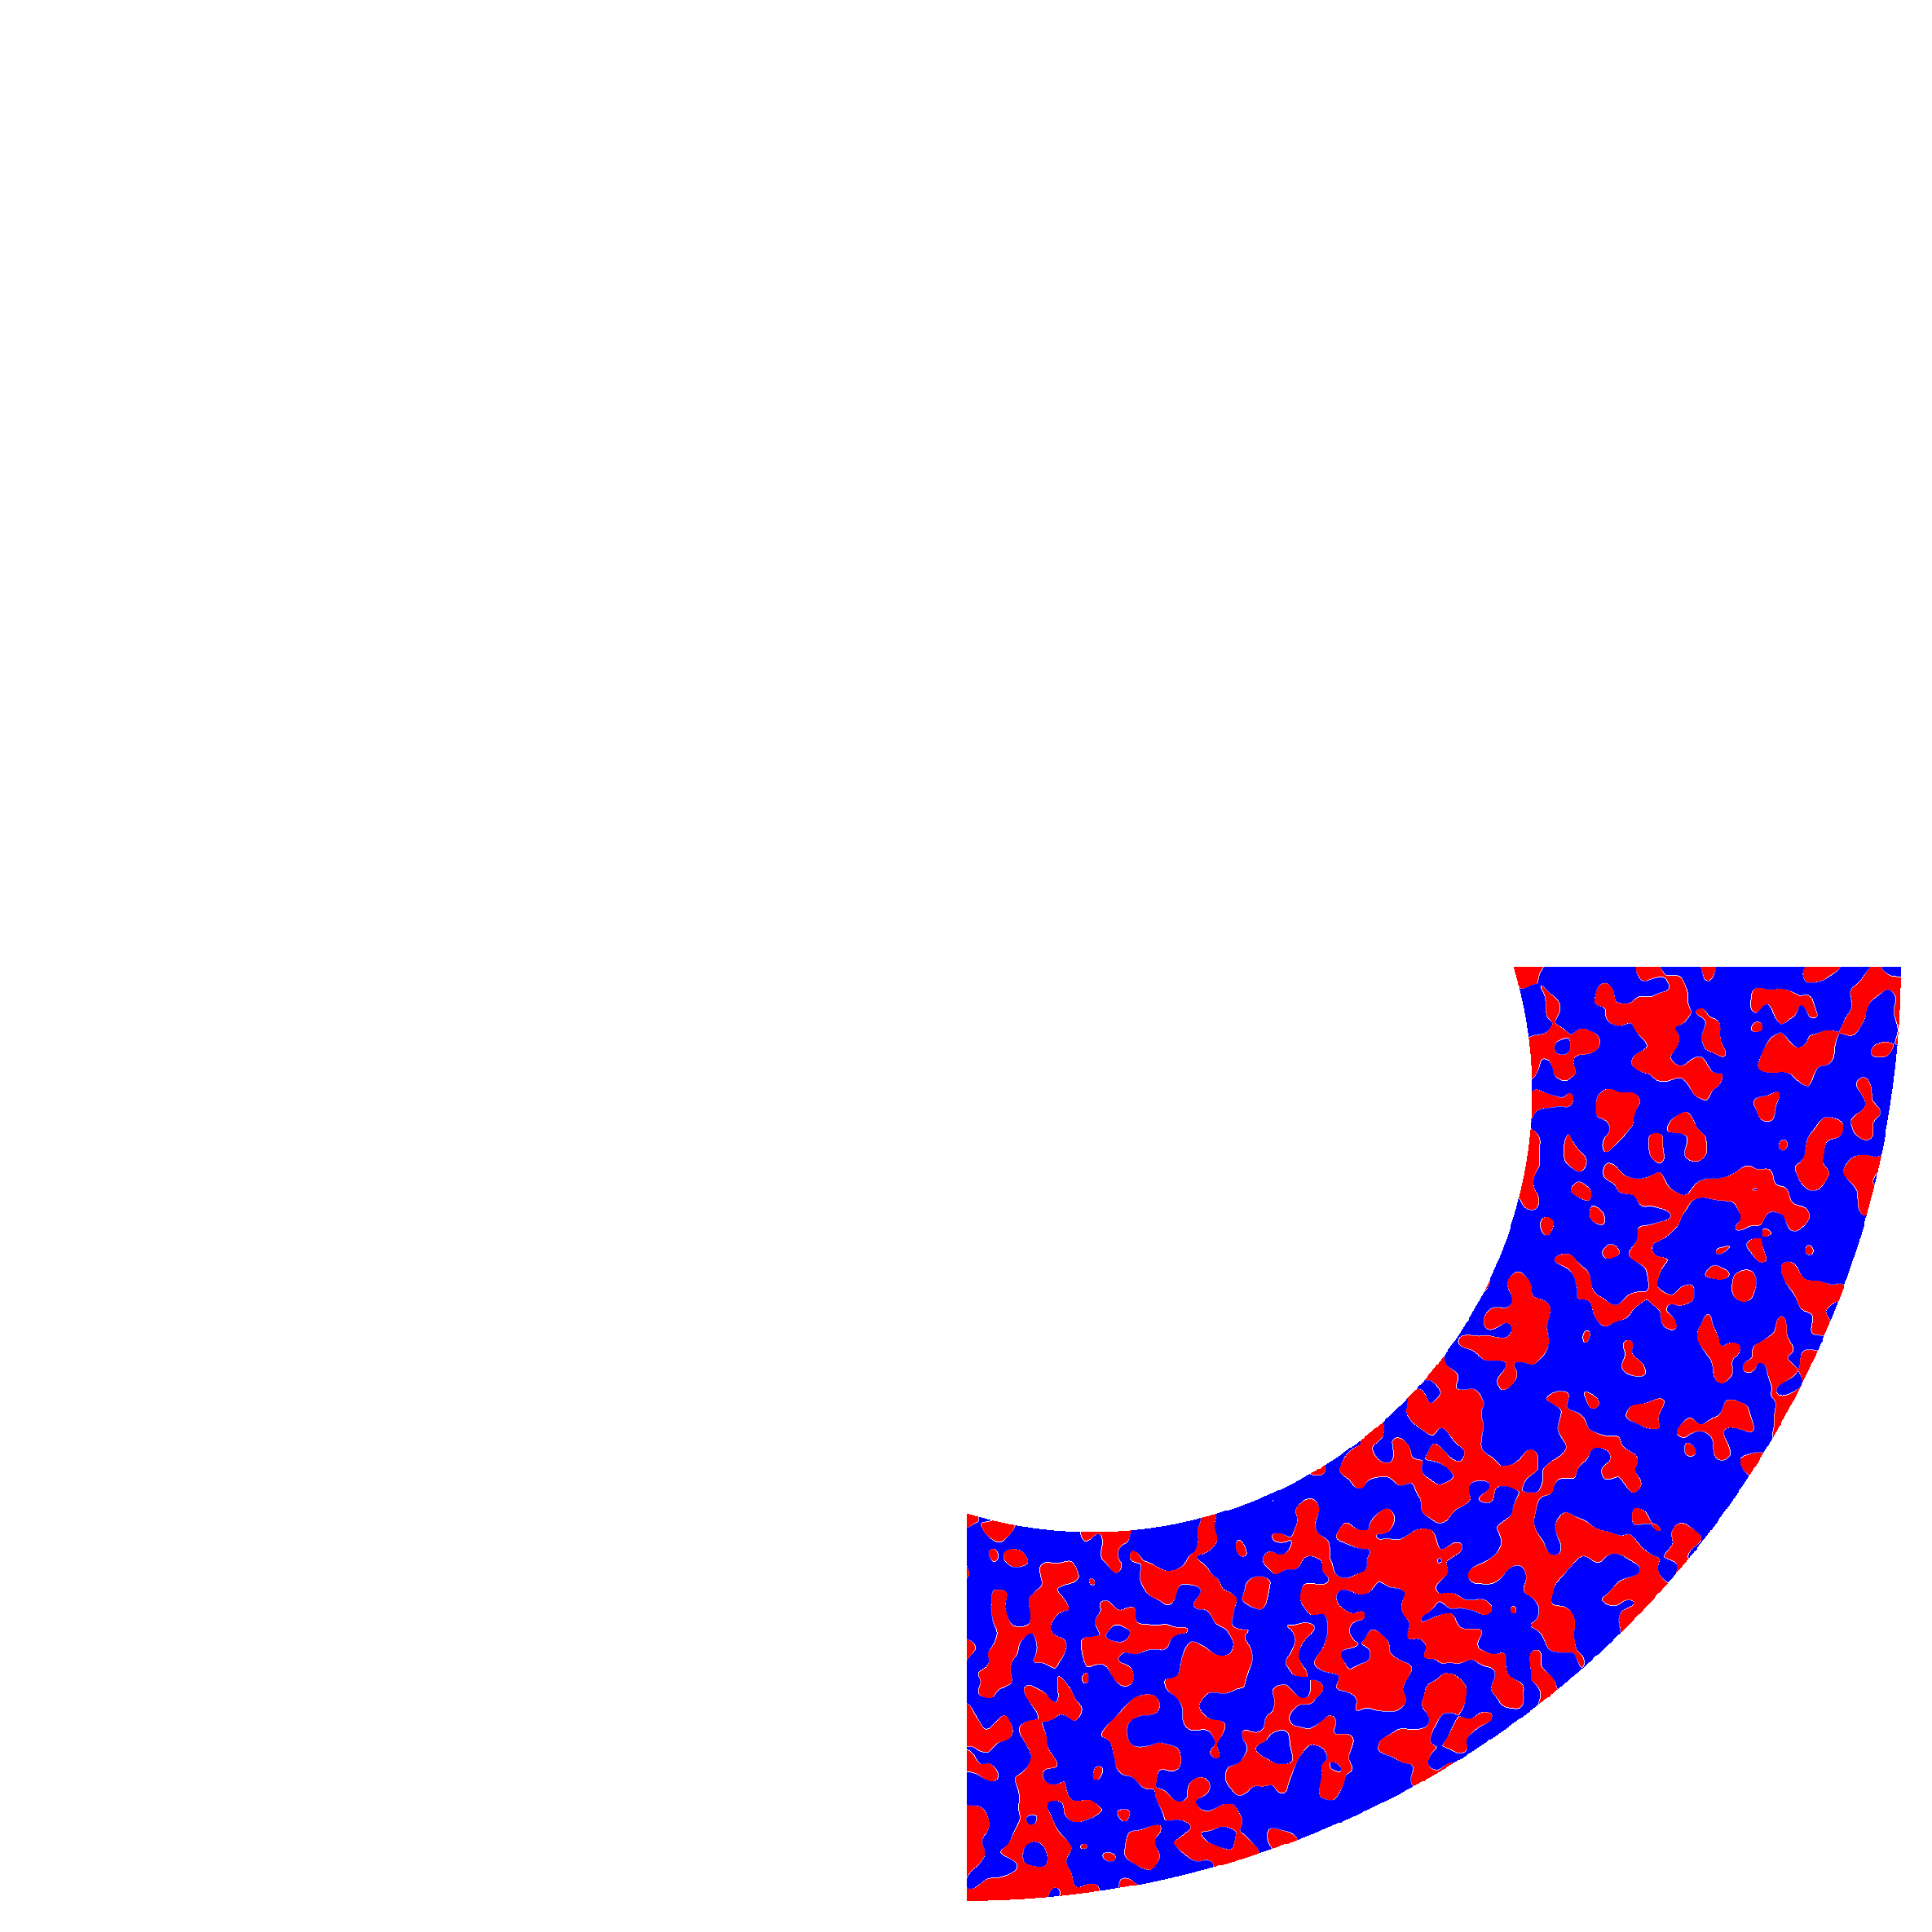

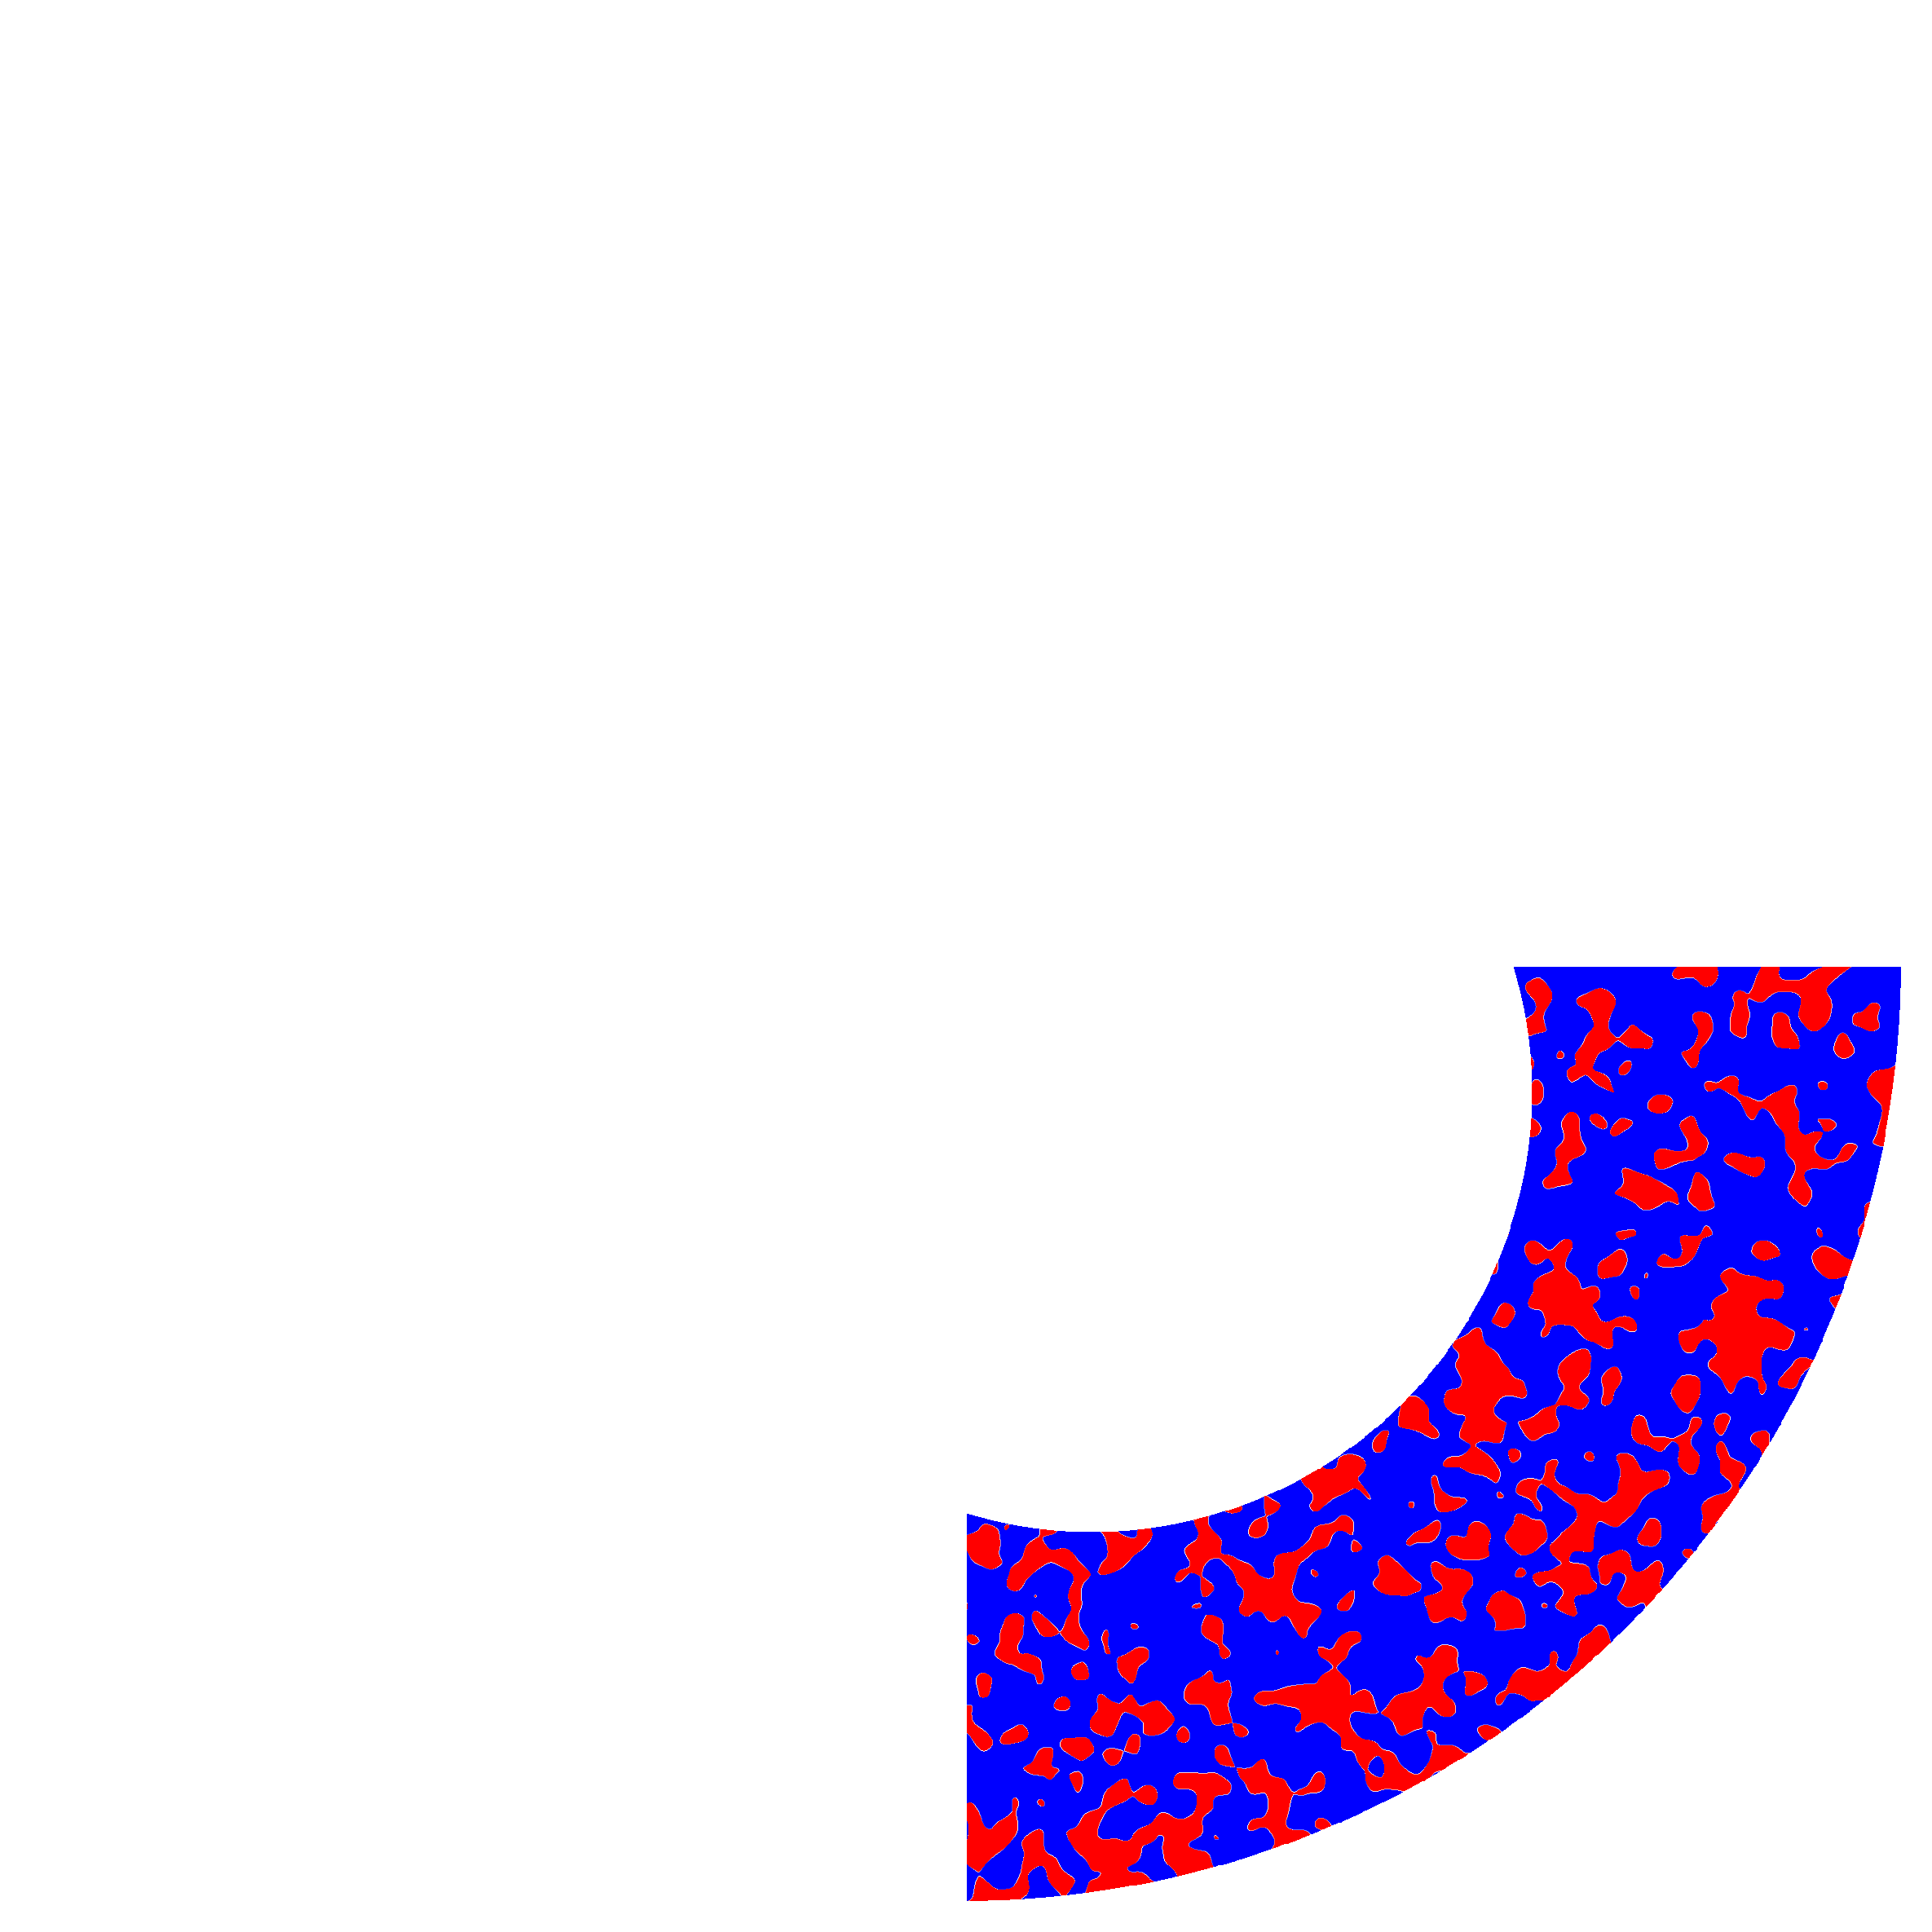

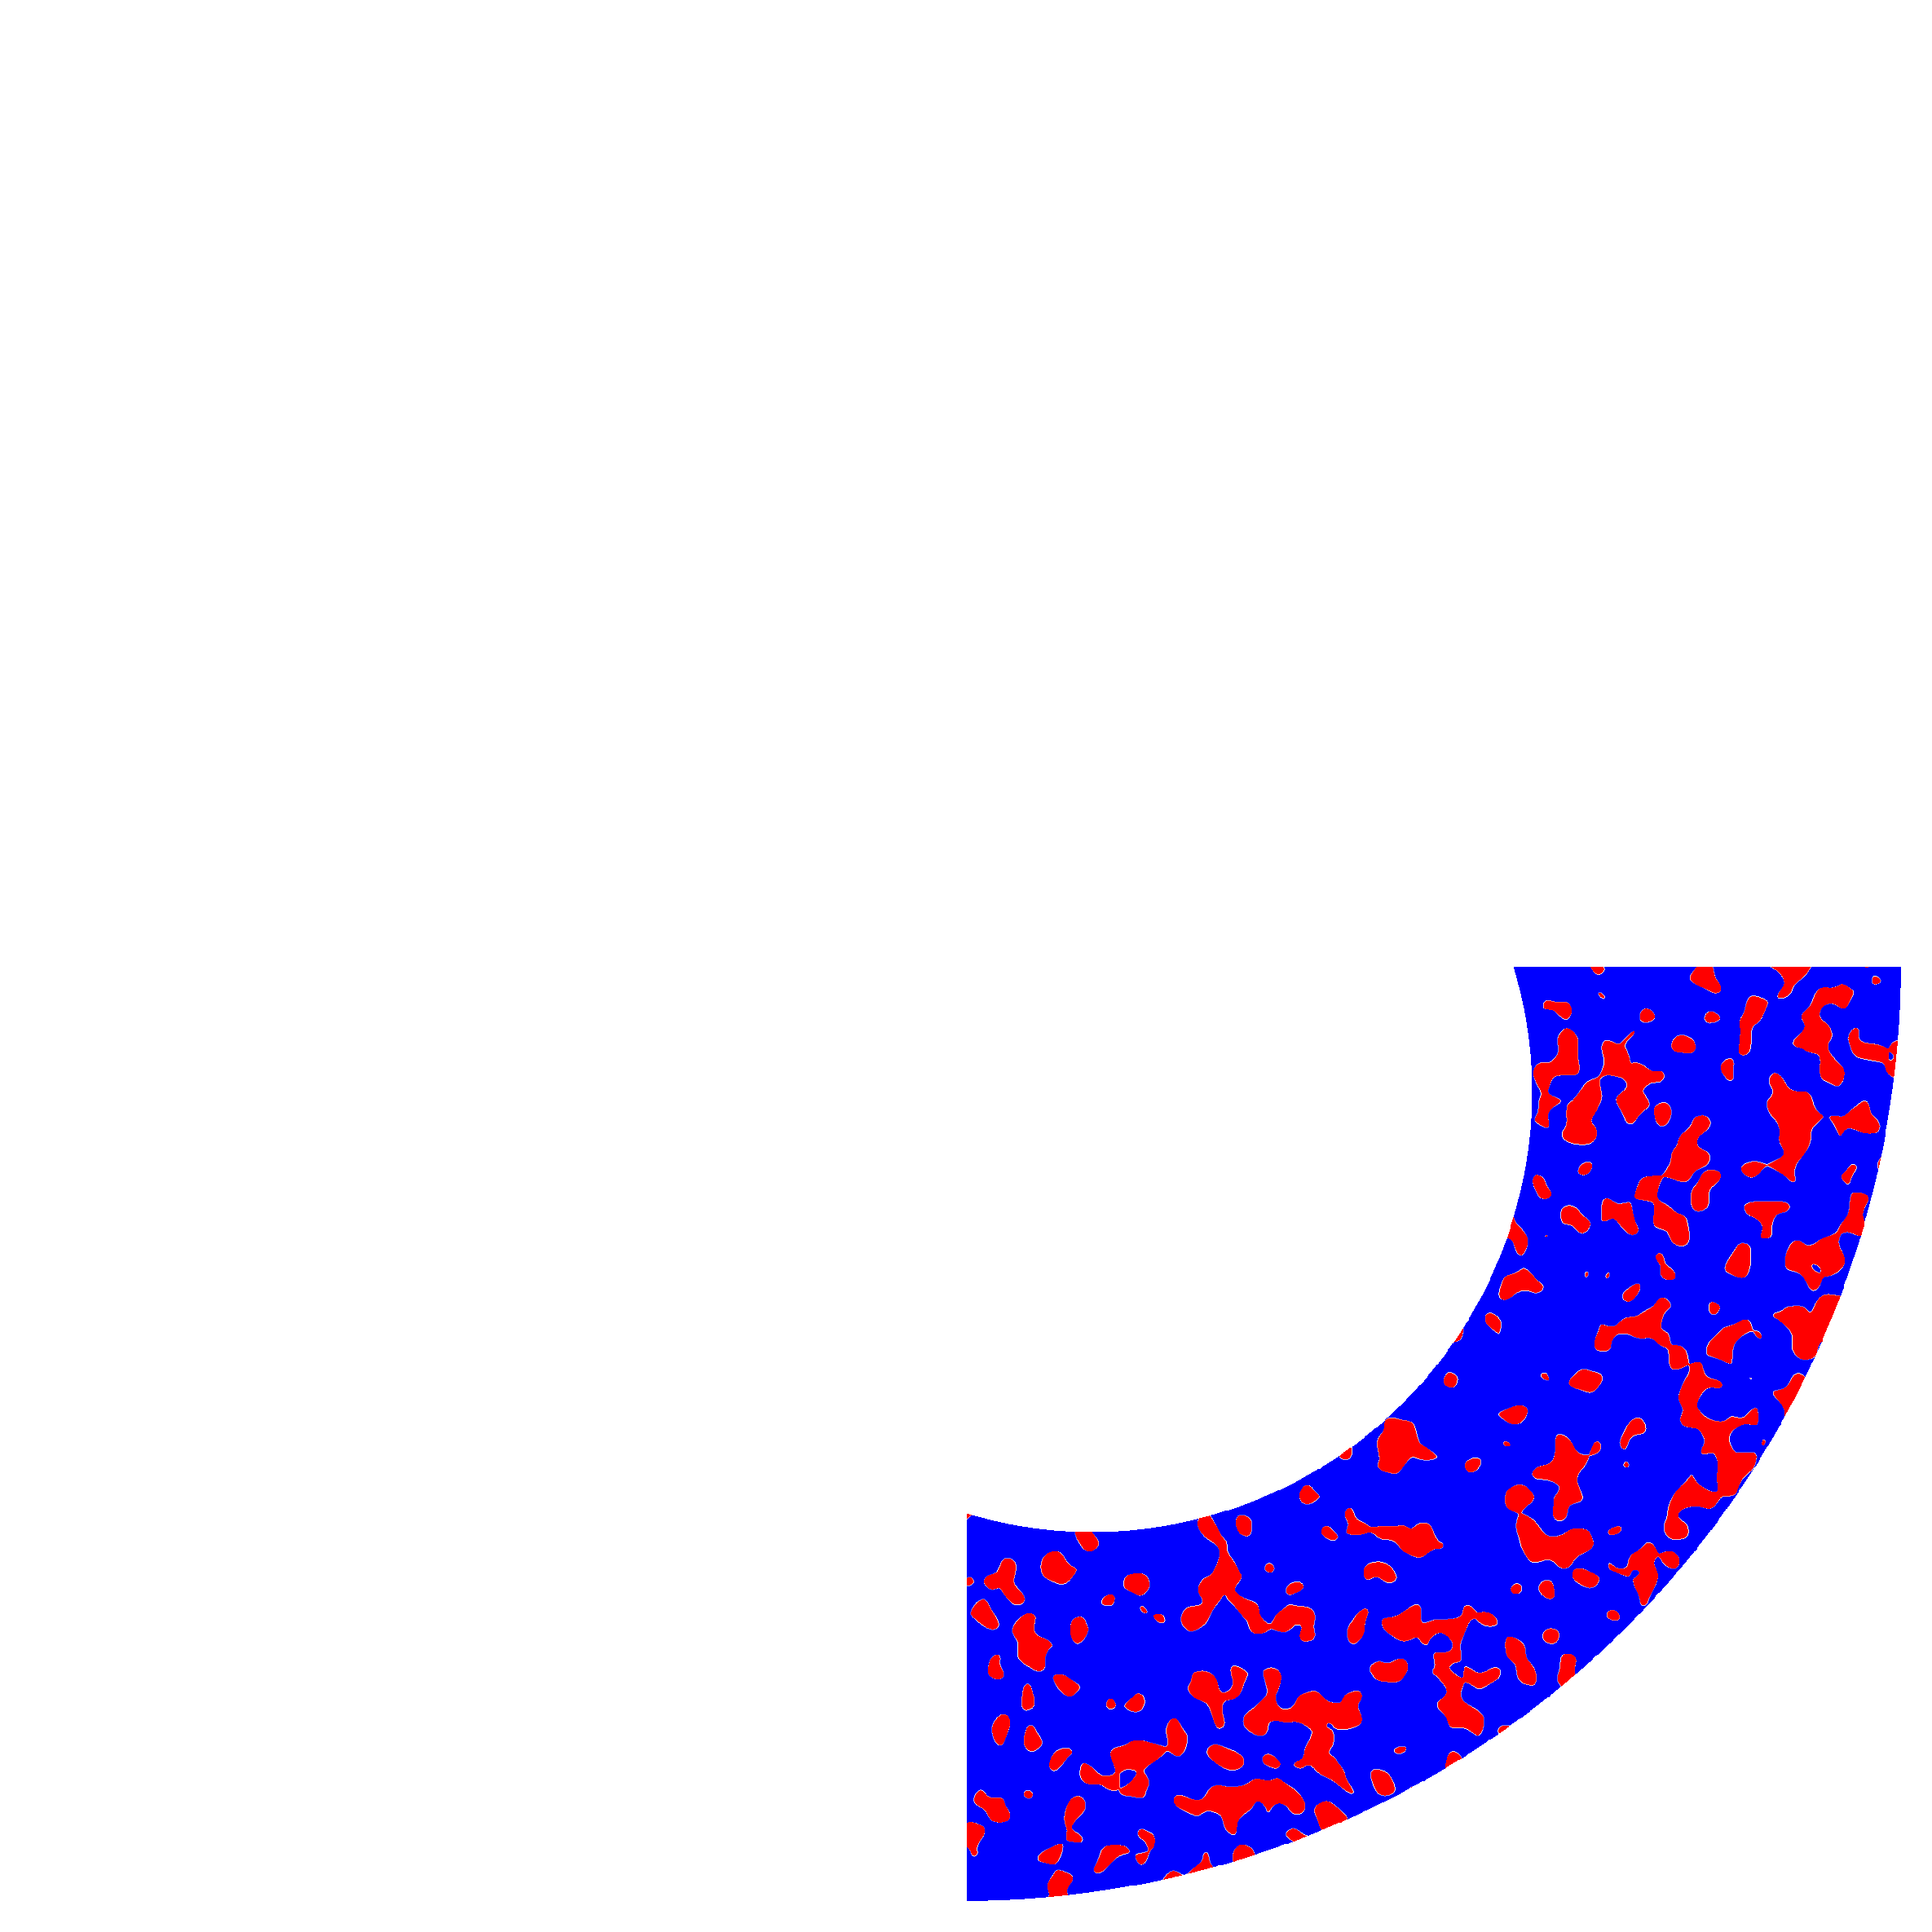

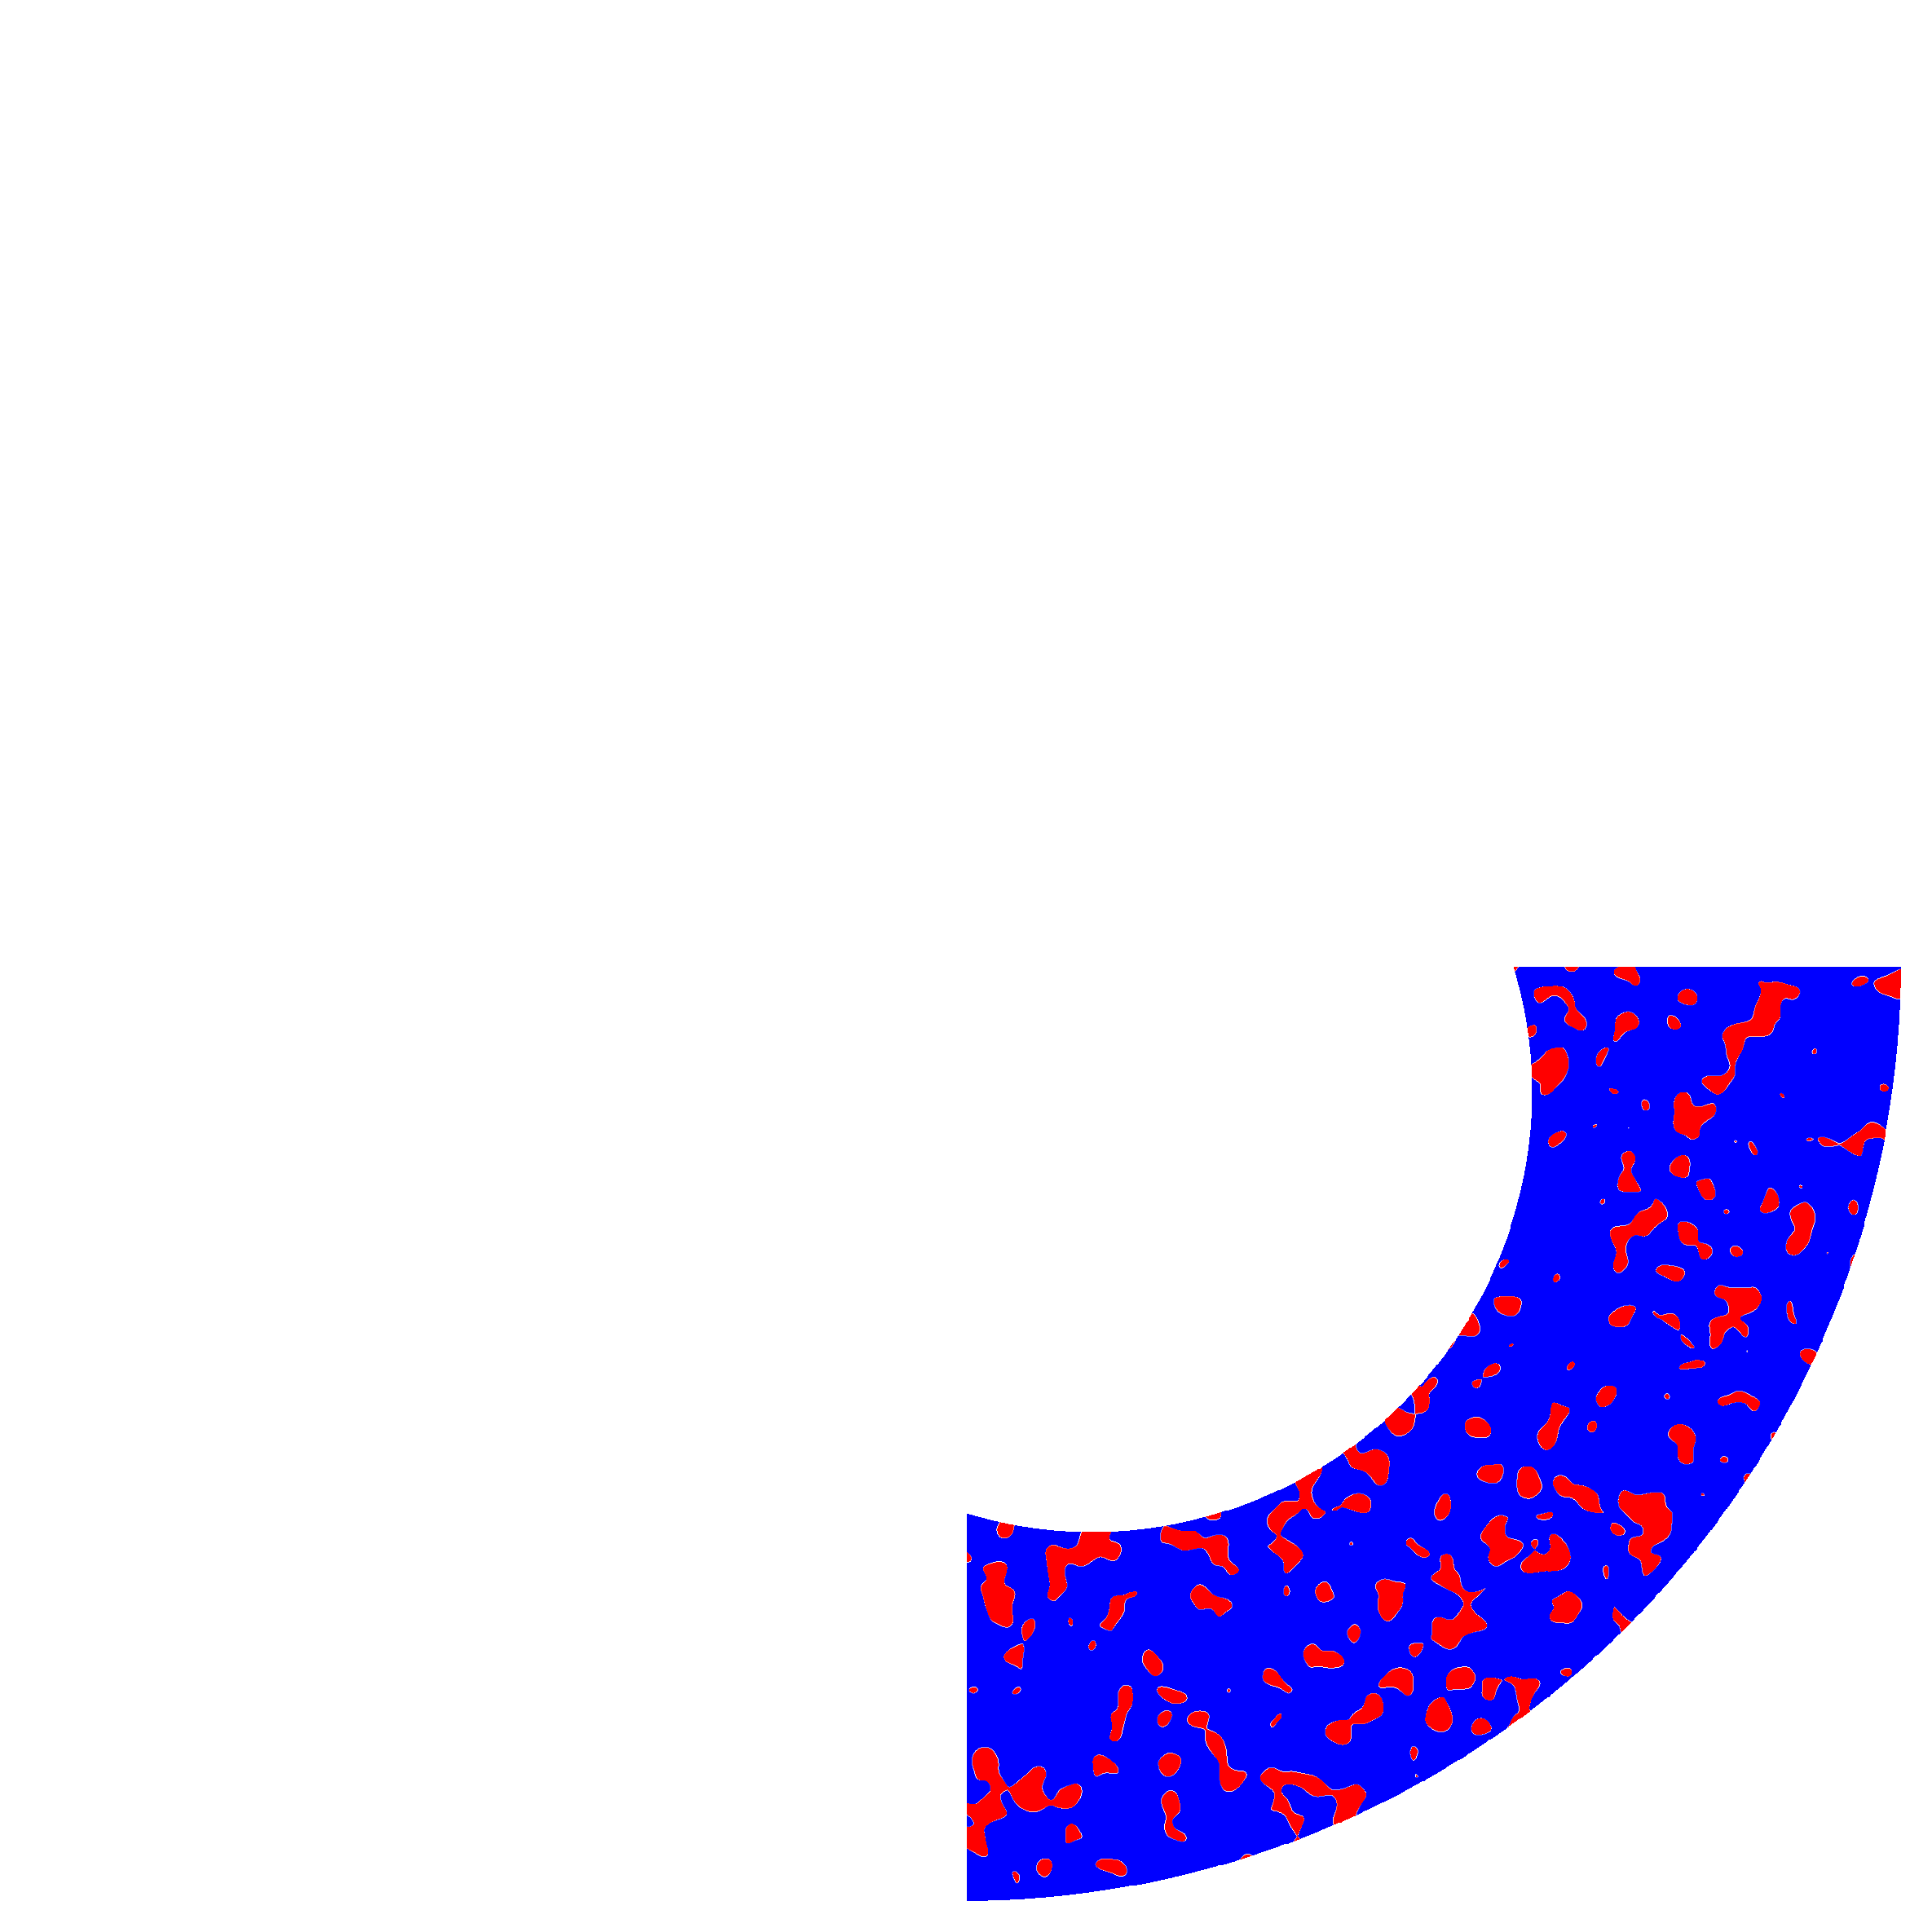

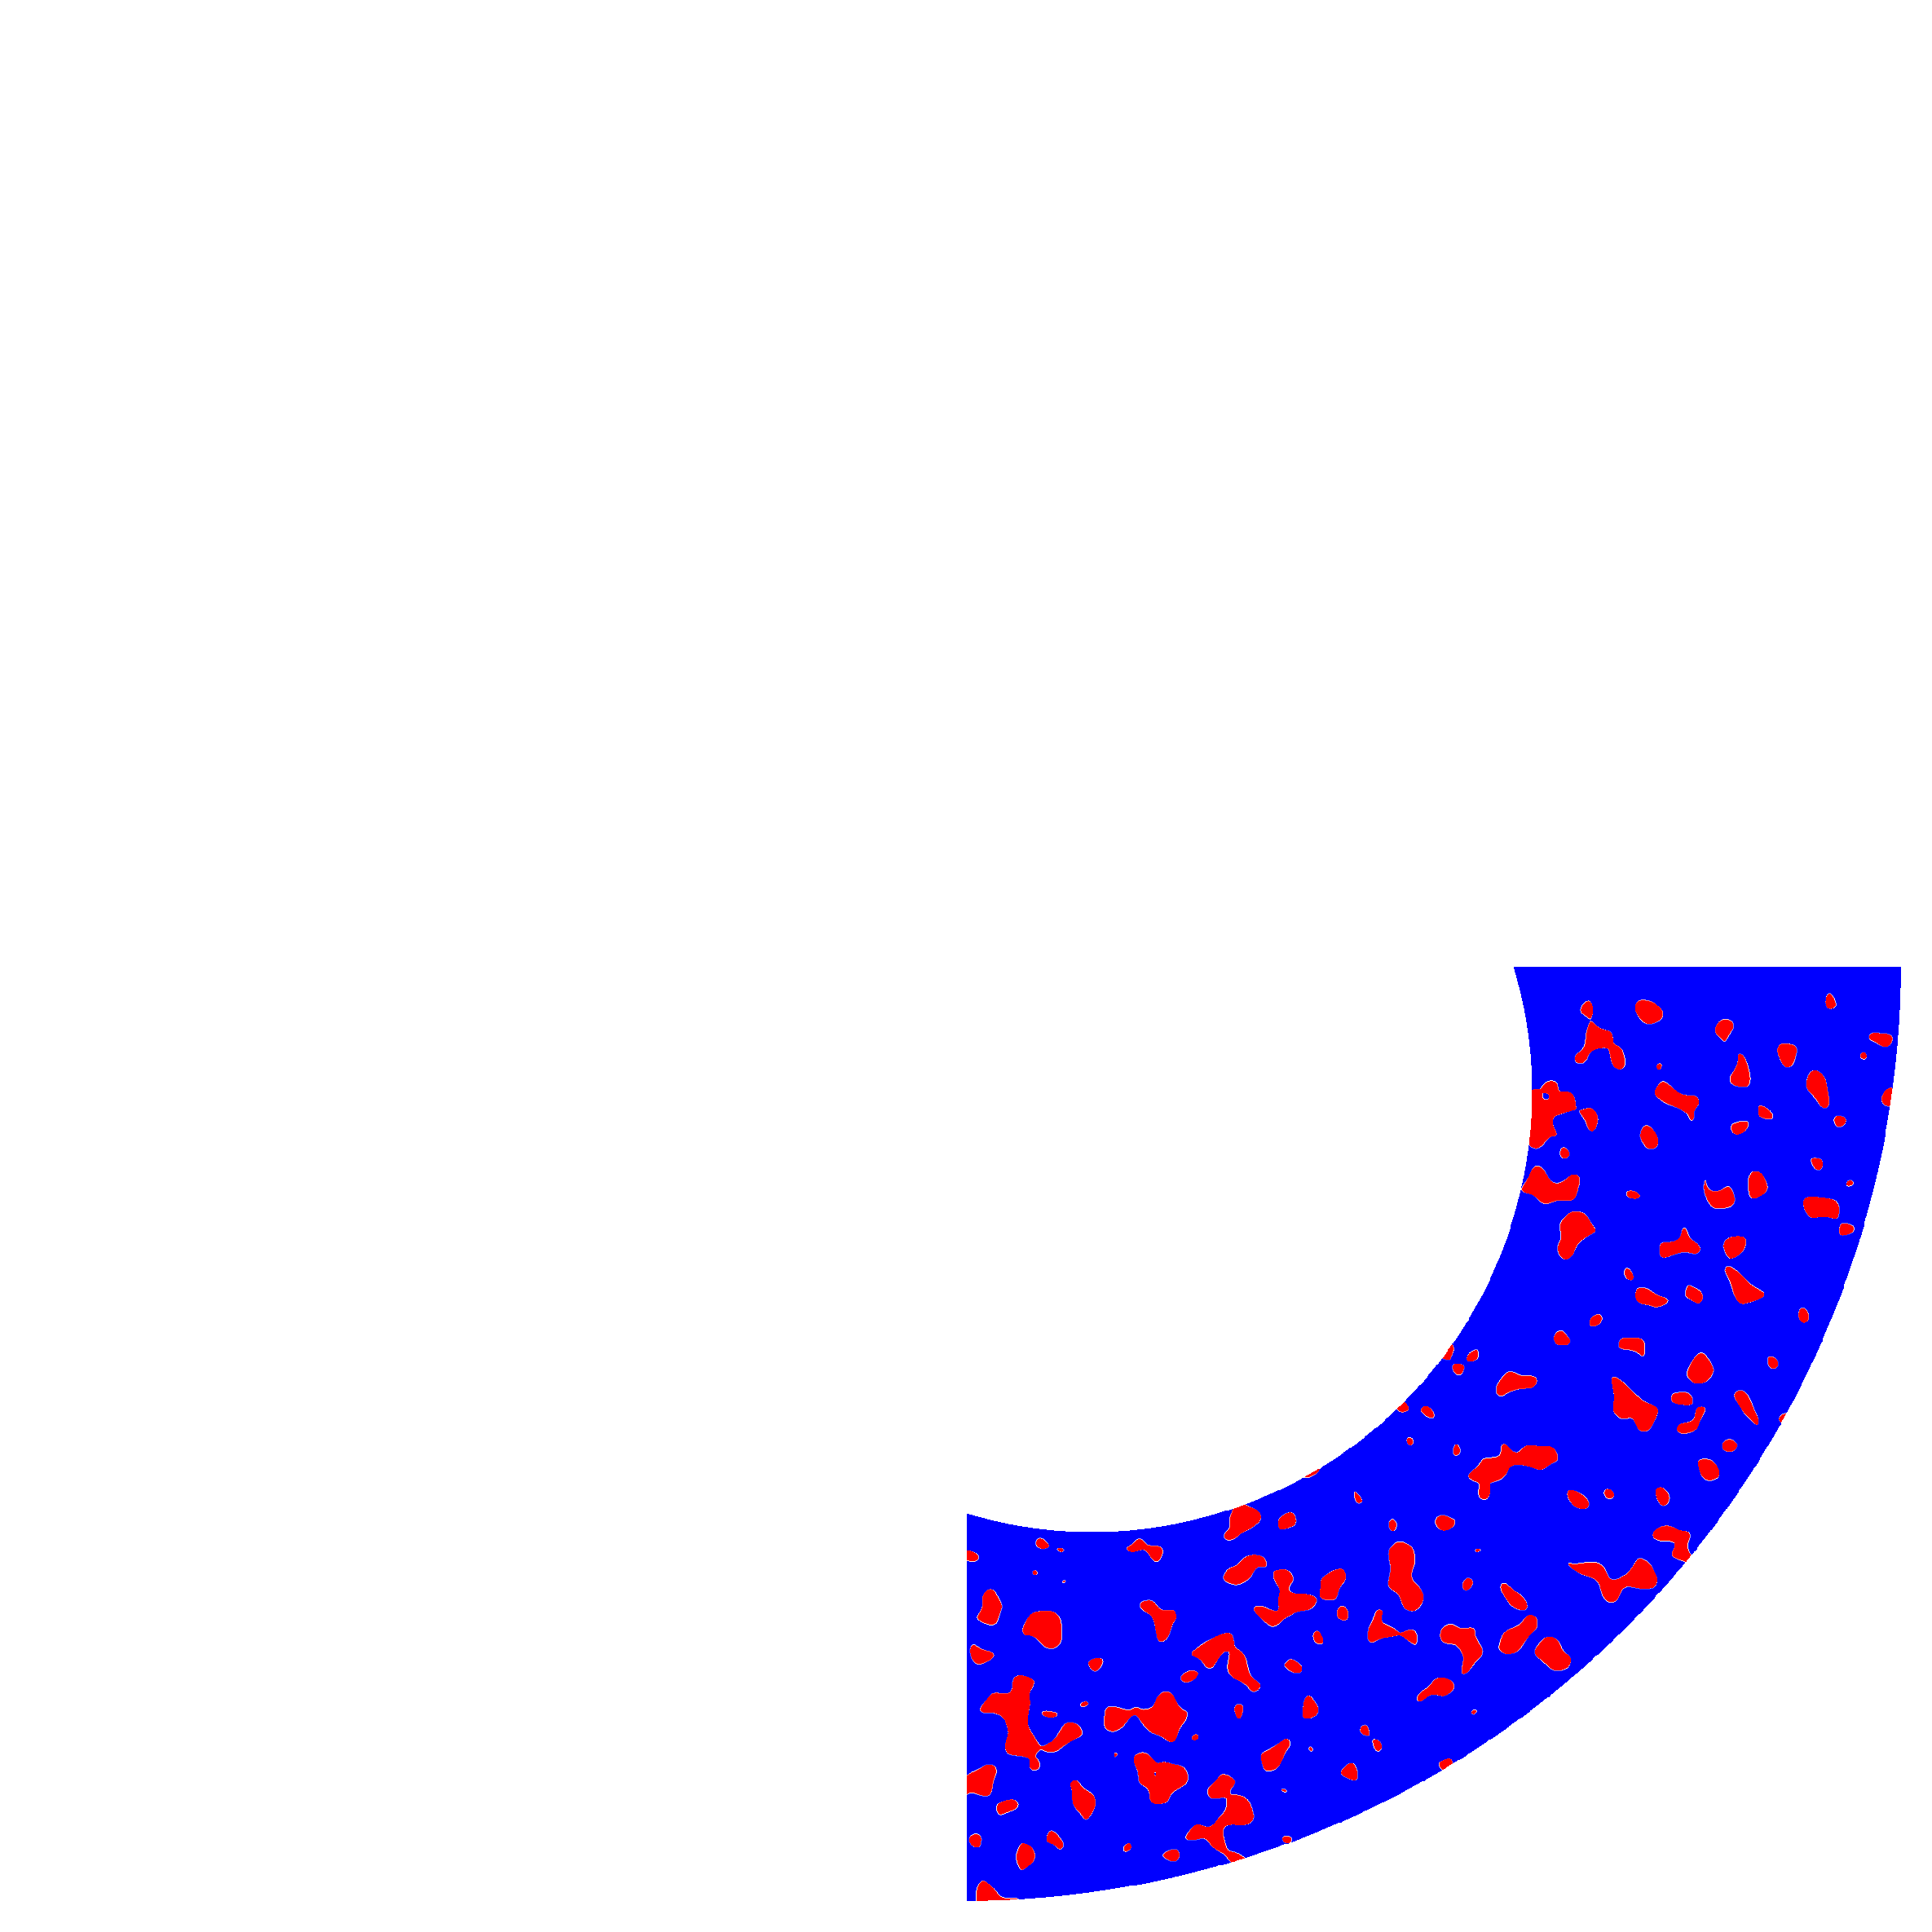

In [1]:
from scipy.optimize import root_scalar, fsolve
from scipy.ndimage import gaussian_filter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def create_circular_aperture(diameter=10):
    sigmoid = lambda x, beta, lims: lims[0] + np.diff(lims) / (1 + np.exp(-beta * x))

    diameter = int(np.floor(diameter / 2) * 2)
    x, y = np.meshgrid(np.arange(1, diameter + 1) - (diameter + 1) / 2, np.arange(1, diameter + 1) - (diameter + 1) / 2)

    patch = sigmoid(np.sqrt(x ** 2 + y ** 2) - diameter / 2, np.log(99), [1, 0])

    return patch


def remove_uncovered_area(matrix, circle_radius=10, circle_center=(300, 300)):
    """
    Remove the area not covered by the circle from the input matrix.

    Args:
    - matrix: Input binary matrix.
    - circle_radius: Radius of the circle.
    - circle_center: Coordinates of the center of the circle.

    Returns:
    - result_matrix: Output matrix after removing the uncovered area.
    """
    # Create a binary matrix representing the entire area
    binary_matrix = np.ones_like(matrix, dtype=bool)
    
    # Generate the circle matrix
    circle_matrix = generate_circle(circle_radius, circle_center, matrix.shape)
    
    # Subtract the circle matrix from the binary matrix
    uncovered_area = np.logical_xor(binary_matrix, circle_matrix) #binary_matrix - circle_matrix
    
    # Remove the uncovered area from the input matrix
    result_matrix = np.copy(matrix)
    result_matrix[uncovered_area] = np.nan
    
    return result_matrix

def cut_upper_half(matrix):
    """
    Cut the upper half of the matrix.

    Args:
    - matrix: Input binary matrix.

    Returns:
    - half_matrix: Output matrix after cutting the upper half.
    """
    half_matrix = np.copy(matrix)
    half_matrix[:half_matrix.shape[0]//2, :] = np.nan
    return half_matrix

def cut_left_half(matrix):
    """
    Cut the left half of the matrix.

    Args:
    - matrix: Input binary matrix.

    Returns:
    - half_matrix: Output matrix after cutting the left half.
    """
    half_matrix = np.copy(matrix)
    half_matrix[:, :half_matrix.shape[1]//2] = np.nan
    return half_matrix

def subtract_circle(matrix, smaller_radius, center):
    """
    Subtract a smaller circle from the input matrix.

    Args:
    - matrix: Input binary matrix.
    - smaller_radius: Radius of the smaller circle.
    - center: Coordinates of the center of the smaller circle.

    Returns:
    - result_matrix: Output matrix after subtracting the smaller circle.
    """
    # Create a grid of coordinates
    x, y = np.meshgrid(np.arange(matrix.shape[1]), np.arange(matrix.shape[0]))
    
    # Calculate distances from each point to the center
    distances = (x - center[1])**2 + (y - center[0])**2
    
    # Set pixels within the smaller circle radius to 0
    result_matrix = np.copy(matrix)
    result_matrix[distances <= smaller_radius**2] = np.nan
    
    return result_matrix

def gen_cue(exp_ratio=0.5, nstd=5, fstd=10, imsize=600):
    p = create_circular_aperture(imsize)
    print(p.shape)
    non_patch = np.ones_like(p)  # Create a matrix of ones with the same shape as patch
    p[p != non_patch] = np.nan  # Set NaN values where the patch is not present
    ROI = p.ravel() > 0.5

    img_noise = nstd * np.random.randn(imsize, imsize) + exp_ratio
    img_filt = gaussian_filter(img_noise, sigma=fstd)

    fun = lambda t,_ : np.mean(img_filt.ravel()[ROI] > t) - exp_ratio

    theta = root_scalar(fun, args=(exp_ratio, ), method='bisect', bracket=[0, 5]).root

    img_bin = np.zeros_like(img_filt)
    img_bin[img_filt > theta] = 1
    img_bin[img_filt < theta] = 0
    img = np.minimum(img_bin, p)

    # npatch = np.ones_like(p>0.5)
    # img[img!=npatch] = np.nan

    prp = np.mean(img.ravel()[ROI] > 0.5)

    return img, prp


np.random.seed(0)

scale = 4
smaller_circle_radius = 140 * scale
smaller_circle_center = np.array([340, 340]) * scale

slope = 2
logistic = lambda x: 1 / (1 + np.exp(-slope * (x)))
count = 0 

for i in np.round(logistic(np.linspace(-1, 1, 12)),2):

    count += 1
    plt.figure(figsize=(10, 10), dpi=300)

    img1, prp = gen_cue(exp_ratio=i, imsize=600 * scale)
    img = cut_upper_half(img1)
    img = cut_left_half(img)
    img = subtract_circle(img, smaller_circle_radius, smaller_circle_center)

    # get bwr colormap and reverse it
    plt.imshow(img, cmap='bwr_r', vmin=0, vmax=1)
    plt.axis('off')  # Turn off axis
    plt.savefig(f'cues/{i}.png', bbox_inches='tight', pad_inches=0, transparent=True)
    # print(prp)
    # plt.title(f'prp={prp:.2f}')
    # break

# plt.suptitle('PYTHON')
# plt.tight_layout()

KeyboardInterrupt: 

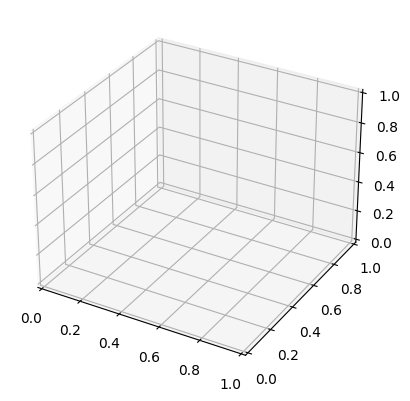

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load your PNG image
image = plt.imread('cues/0.12.png')

# Create a meshgrid for x and y
x = np.linspace(0, 1, image.shape[1])
y = np.linspace(0, 1, image.shape[0])
X, Y = np.meshgrid(x, y)

# Z dimension for stacking the image
Z = np.zeros_like(X)

# Create a figure and 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the image as a surface
ax.plot_surface(X, Y, Z, facecolors=image, rstride=1, cstride=1, shade=False)

# Hide the axes
ax.axis('off')

# Show the plot
plt.show()

In [22]:
import cv2
import numpy as np

# Load the circle image
circle_img = cv2.imread("cues/0.12.png", cv2.IMREAD_UNCHANGED)
# Get dimensions of the image
height, width = circle_img.shape[:2]


# Define the thickness of the disc
thickness = 10  # Adjust as needed

# Create an empty canvas for the 3D disc
disc = np.zeros((height, width, 4, thickness), dtype=np.uint8)

# Stack the circle images along the z-axis
for i in range(thickness):
    disc[:, :, :, i] = circle_img[:, :, :]


# Display or save the 3D disc
# For displaying
cv2.imshow('3D Disc', disc)
# cv2.waitKey(100)

# For saving
# for i in range(thickness):
#     cv2.imwrite(f'disc_{i}.png', disc[:, :, i])

# Close OpenCV windows
# cv2.destroyAllWindows()


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:124: error: (-215:Assertion failed) bmi && width >= 0 && height >= 0 && (bpp == 8 || bpp == 24 || bpp == 32) in function 'FillBitmapInfo'


In [28]:
cv2.destroyAllWindows()

In [47]:
import cv2
import numpy as np

# Load the circle image
circle_img = cv2.imread("cues/0.12.png", cv2.IMREAD_UNCHANGED)

# Get dimensions of the image
height, width, channels = circle_img.shape

# Define the thickness of the disc
thickness = 300  # Adjust as needed

# Create an empty canvas for the 3D disc
disc = np.zeros((height, width, channels * thickness), dtype=np.uint8)

# Stack the circle images along the z-axis
for i in range(thickness):
    disc[:, :, i * channels:(i + 1) * channels] = circle_img


def write_obj(vertices, output_obj_path='output.obj'):
    with open(output_obj_path, 'w') as obj_file:
        for vertex in vertices:
            obj_file.write(f'v {vertex[0]} {vertex[1]} {vertex[2]}\n')

    print(f'OBJ file saved to {output_obj_path}')

write_obj(disc, 'disc.obj')

OBJ file saved to disc.obj
